In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pylab import rcParams
import warnings

warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20, 16

### Overview about the data

In [2]:
data = pd.read_csv("Data/MER_T12_06.csv")
data.head()

MSN  YYYYMM   Value  Column_Order  \
0  CLEIEUS  197301  72.076             1   
1  CLEIEUS  197302  64.442             1   
2  CLEIEUS  197303  64.084             1   
3  CLEIEUS  197304  60.842             1   
4  CLEIEUS  197305  61.798             1   

                                Description  \
0  Coal Electric Power Sector CO2 Emissions   
1  Coal Electric Power Sector CO2 Emissions   
2  Coal Electric Power Sector CO2 Emissions   
3  Coal Electric Power Sector CO2 Emissions   
4  Coal Electric Power Sector CO2 Emissions   

                                    Unit  
0  Million Metric Tons of Carbon Dioxide  
1  Million Metric Tons of Carbon Dioxide  
2  Million Metric Tons of Carbon Dioxide  
3  Million Metric Tons of Carbon Dioxide  
4  Million Metric Tons of Carbon Dioxide

In [3]:
data.tail()

MSN  YYYYMM    Value  Column_Order  \
5089  TXEIEUS  201603  115.997             9   
5090  TXEIEUS  201604  113.815             9   
5091  TXEIEUS  201605   129.44             9   
5092  TXEIEUS  201606  172.074             9   
5093  TXEIEUS  201607  201.958             9   

                                           Description  \
5089  Total Energy Electric Power Sector CO2 Emissions   
5090  Total Energy Electric Power Sector CO2 Emissions   
5091  Total Energy Electric Power Sector CO2 Emissions   
5092  Total Energy Electric Power Sector CO2 Emissions   
5093  Total Energy Electric Power Sector CO2 Emissions   

                                       Unit  
5089  Million Metric Tons of Carbon Dioxide  
5090  Million Metric Tons of Carbon Dioxide  
5091  Million Metric Tons of Carbon Dioxide  
5092  Million Metric Tons of Carbon Dioxide  
5093  Million Metric Tons of Carbon Dioxide

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [5]:
data.isnull().sum() #no null values

MSN             0
YYYYMM          0
Value           0
Column_Order    0
Description     0
Unit            0
dtype: int64

### Read data with time series and clean it

#### Because in the data may have some string if we default it will raise expection so change it to coerce it will change that string value to NaT

In [6]:
dateparse = lambda x: pd.to_datetime(x, format = '%Y%m', errors = 'coerce')
df = pd.read_csv("Data/MER_T12_06.csv", parse_dates = ['YYYYMM'], index_col = 'YYYYMM', date_parser = dateparse) 
df.head(15)

MSN    Value  Column_Order  \
YYYYMM                                       
1973-01-01  CLEIEUS   72.076             1   
1973-02-01  CLEIEUS   64.442             1   
1973-03-01  CLEIEUS   64.084             1   
1973-04-01  CLEIEUS   60.842             1   
1973-05-01  CLEIEUS   61.798             1   
1973-06-01  CLEIEUS   66.538             1   
1973-07-01  CLEIEUS   72.626             1   
1973-08-01  CLEIEUS   75.181             1   
1973-09-01  CLEIEUS   68.397             1   
1973-10-01  CLEIEUS   67.668             1   
1973-11-01  CLEIEUS   67.021             1   
1973-12-01  CLEIEUS   71.118             1   
NaT         CLEIEUS  811.791             1   
1974-01-01  CLEIEUS    70.55             1   
1974-02-01  CLEIEUS   62.929             1   

                                         Description  \
YYYYMM                                                 
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   
1973-06-01  Coal Electric Power Sector CO2 Emissions   
1973-07-01  Coal Electric Power Sector CO2 Emissions   
1973-08-01  Coal Electric Power Sector CO2 Emissions   
1973-09-01  Coal Electric Power Sector CO2 Emissions   
1973-10-01  Coal Electric Power Sector CO2 Emissions   
1973-11-01  Coal Electric Power Sector CO2 Emissions   
1973-12-01  Coal Electric Power Sector CO2 Emissions   
NaT         Coal Electric Power Sector CO2 Emissions   
1974-01-01  Coal Electric Power Sector CO2 Emissions   
1974-02-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide  
1973-06-01  Million Metric Tons of Carbon Dioxide  
1973-07-01  Million Metric Tons of Carbon Dioxide  
1973-08-01  Million Metric Tons of Carbon Dioxide  
1973-09-01  Million Metric Tons of Carbon Dioxide  
1973-10-01  Million Metric Tons of Carbon Dioxide  
1973-11-01  Million Metric Tons of Carbon Dioxide  
1973-12-01  Million Metric Tons of Carbon Dioxide  
NaT         Million Metric Tons of Carbon Dioxide  
1974-01-01  Million Metric Tons of Carbon Dioxide  
1974-02-01  Million Metric Tons of Carbon Dioxide

#### You can see that the NaT row is the row that contains the sum value of one year. Let get rid of it

In [7]:
df = df[df.index.isnull() == False]
df.head(15)

MSN   Value  Column_Order  \
YYYYMM                                      
1973-01-01  CLEIEUS  72.076             1   
1973-02-01  CLEIEUS  64.442             1   
1973-03-01  CLEIEUS  64.084             1   
1973-04-01  CLEIEUS  60.842             1   
1973-05-01  CLEIEUS  61.798             1   
1973-06-01  CLEIEUS  66.538             1   
1973-07-01  CLEIEUS  72.626             1   
1973-08-01  CLEIEUS  75.181             1   
1973-09-01  CLEIEUS  68.397             1   
1973-10-01  CLEIEUS  67.668             1   
1973-11-01  CLEIEUS  67.021             1   
1973-12-01  CLEIEUS  71.118             1   
1974-01-01  CLEIEUS   70.55             1   
1974-02-01  CLEIEUS  62.929             1   
1974-03-01  CLEIEUS  64.519             1   

                                         Description  \
YYYYMM                                                 
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   
1973-06-01  Coal Electric Power Sector CO2 Emissions   
1973-07-01  Coal Electric Power Sector CO2 Emissions   
1973-08-01  Coal Electric Power Sector CO2 Emissions   
1973-09-01  Coal Electric Power Sector CO2 Emissions   
1973-10-01  Coal Electric Power Sector CO2 Emissions   
1973-11-01  Coal Electric Power Sector CO2 Emissions   
1973-12-01  Coal Electric Power Sector CO2 Emissions   
1974-01-01  Coal Electric Power Sector CO2 Emissions   
1974-02-01  Coal Electric Power Sector CO2 Emissions   
1974-03-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide  
1973-06-01  Million Metric Tons of Carbon Dioxide  
1973-07-01  Million Metric Tons of Carbon Dioxide  
1973-08-01  Million Metric Tons of Carbon Dioxide  
1973-09-01  Million Metric Tons of Carbon Dioxide  
1973-10-01  Million Metric Tons of Carbon Dioxide  
1973-11-01  Million Metric Tons of Carbon Dioxide  
1973-12-01  Million Metric Tons of Carbon Dioxide  
1974-01-01  Million Metric Tons of Carbon Dioxide  
1974-02-01  Million Metric Tons of Carbon Dioxide  
1974-03-01  Million Metric Tons of Carbon Dioxide

#### Check the value columns and change it to float

In [8]:
df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSN           4707 non-null   object 
 1   Value         4323 non-null   float64
 2   Column_Order  4707 non-null   int64  
 3   Description   4707 non-null   object 
 4   Unit          4707 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 220.6+ KB


#### We can see that in the value columns there are 4323 non-null values above 4707 values. Let drop it

In [10]:
df.dropna(inplace = True)

#### Check again

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4323 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSN           4323 non-null   object 
 1   Value         4323 non-null   float64
 2   Column_Order  4323 non-null   int64  
 3   Description   4323 non-null   object 
 4   Unit          4323 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 202.6+ KB


### 1. Decomposition, Visualization data

In [12]:
Energy = df.groupby(["Description"])

#### Visualization data

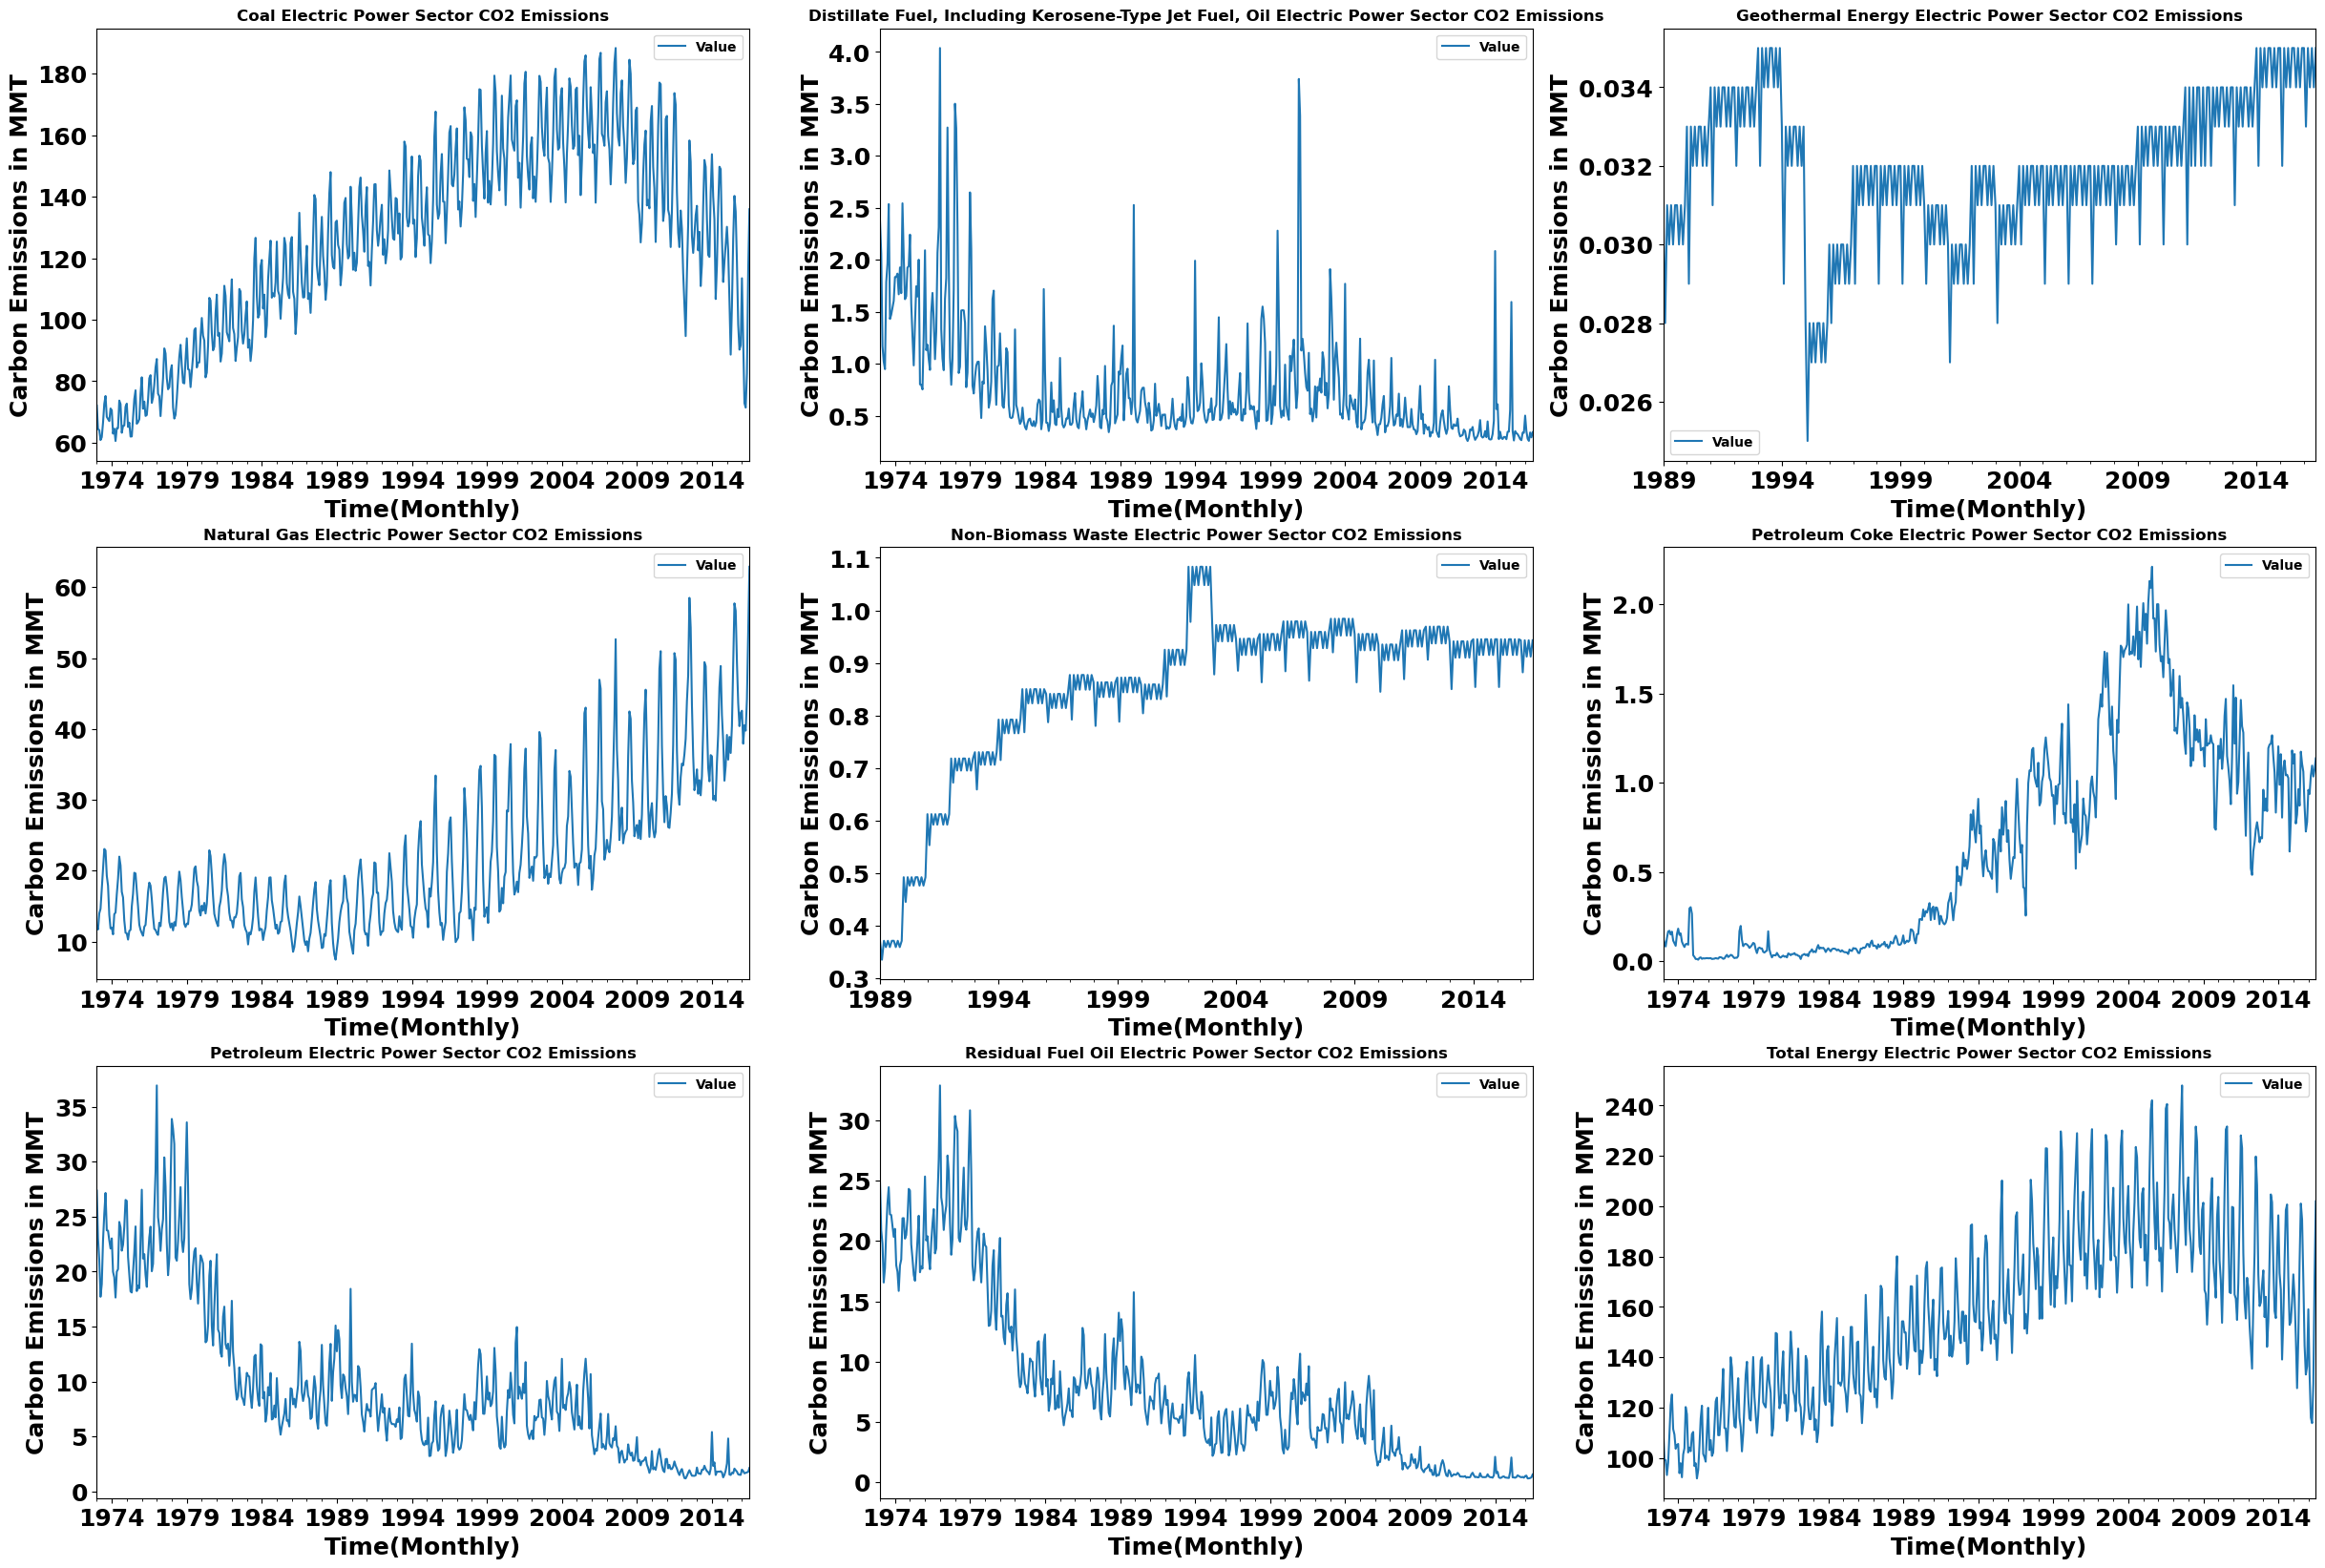

In [13]:
fig, axes = plt.subplots(3,3, figsize = (30, 20))
for (desc, group), ax in zip(Energy, axes.flatten()):
    group.plot(y ='Value',ax = ax, title=desc, fontsize = 18, use_index = True )
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

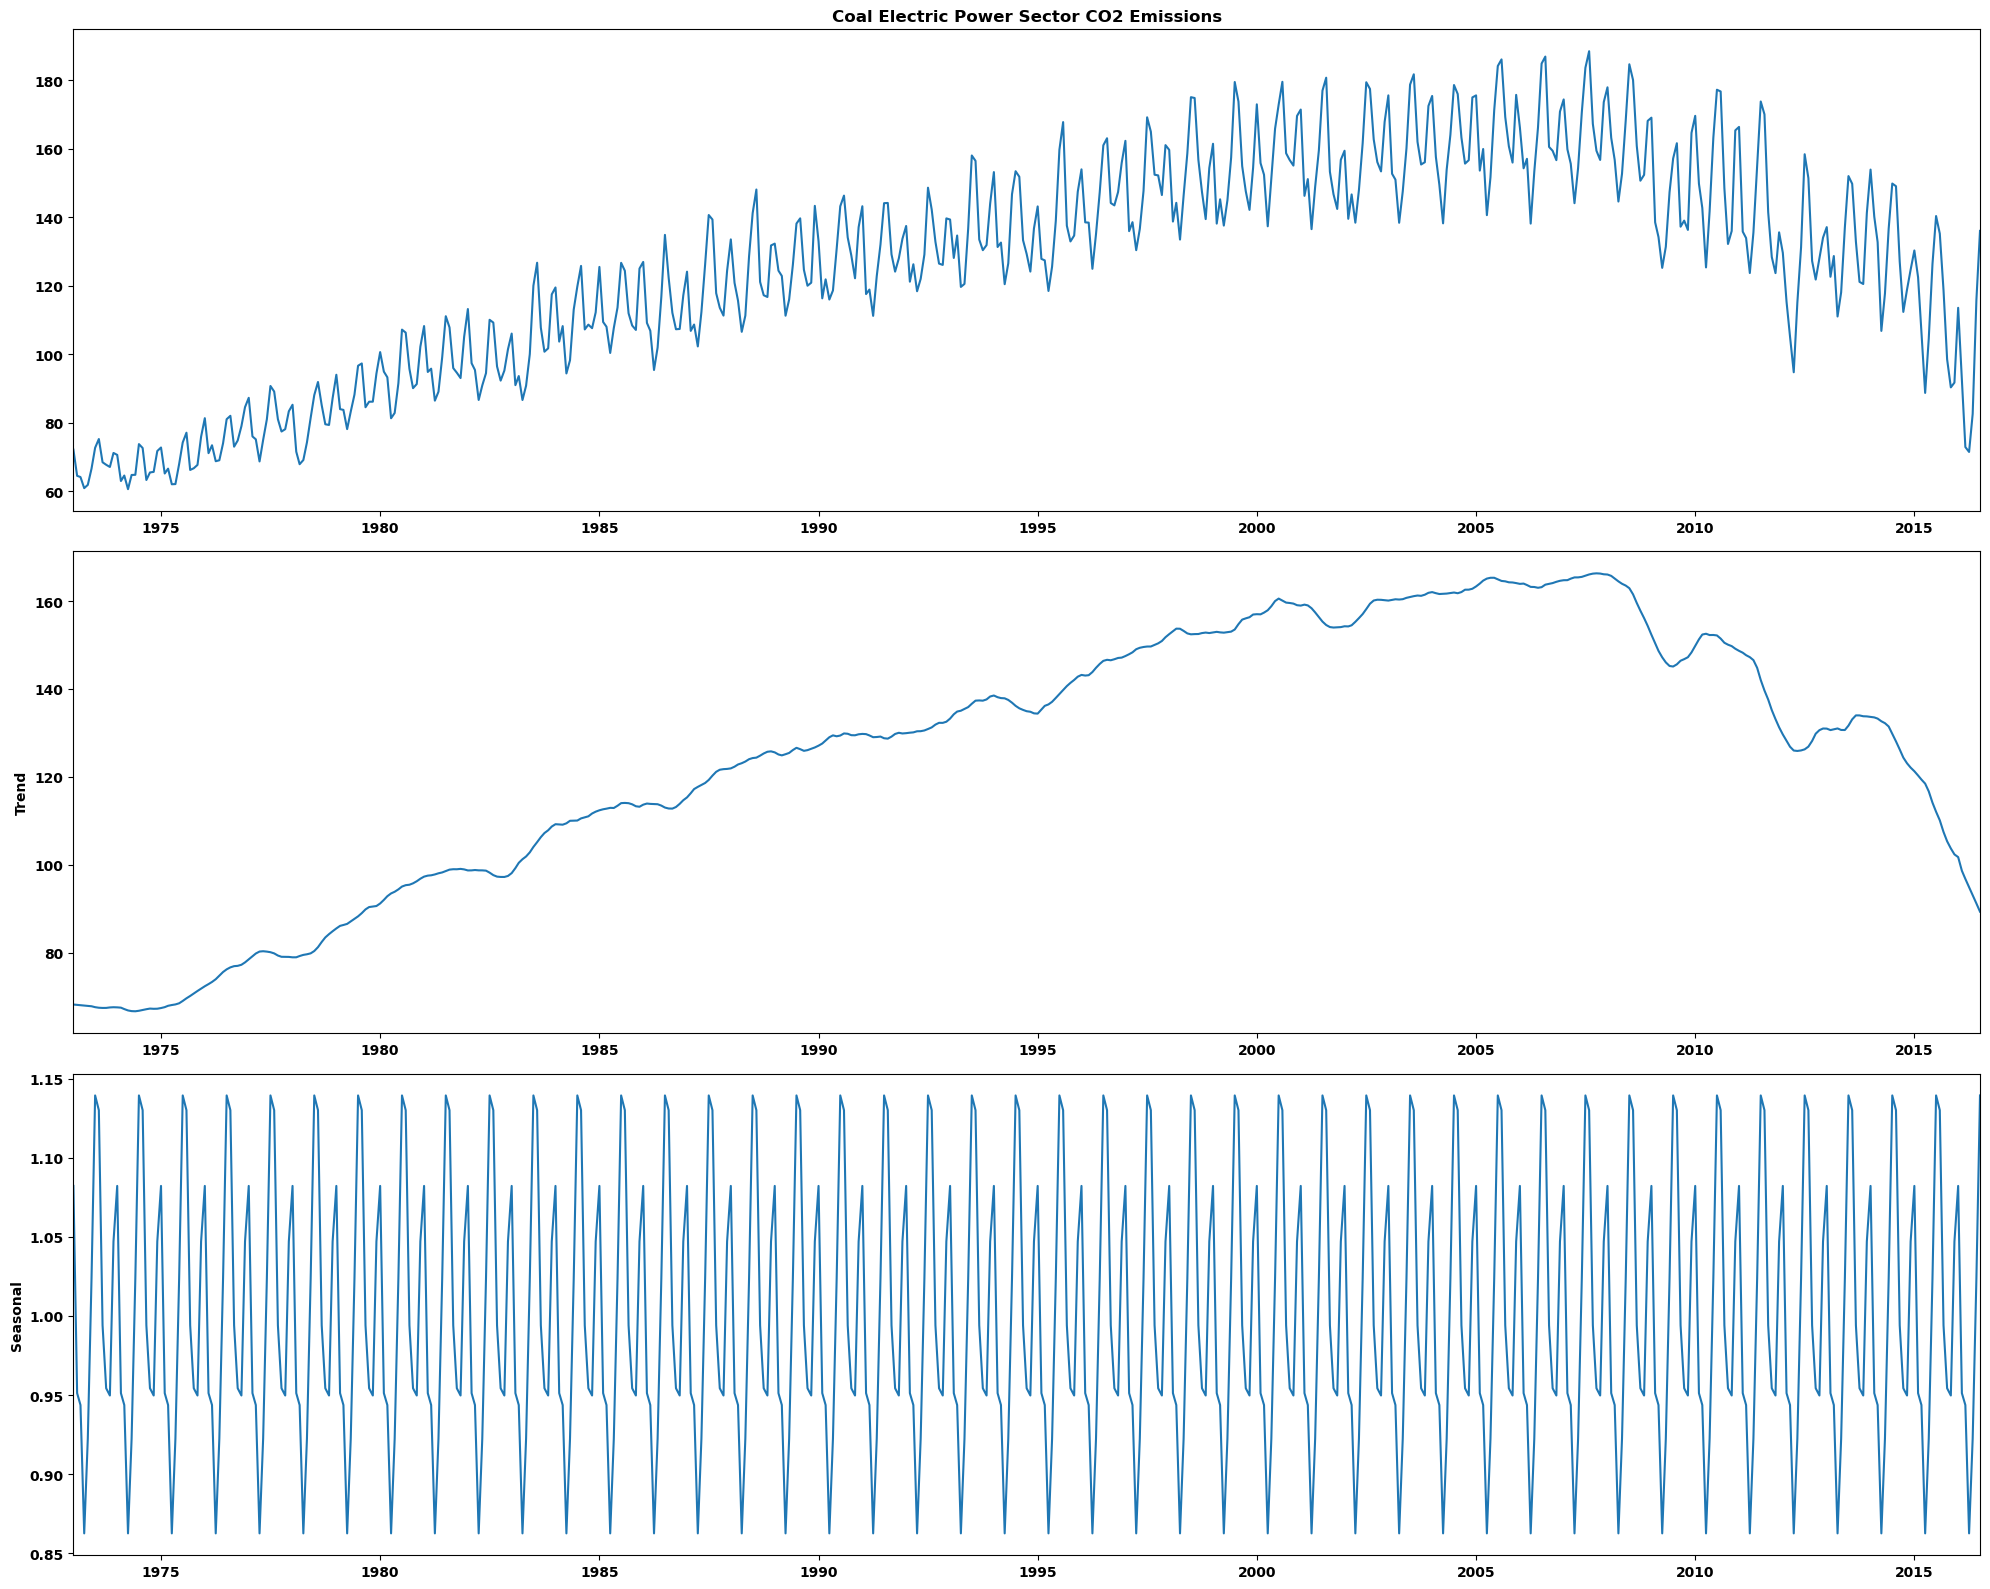

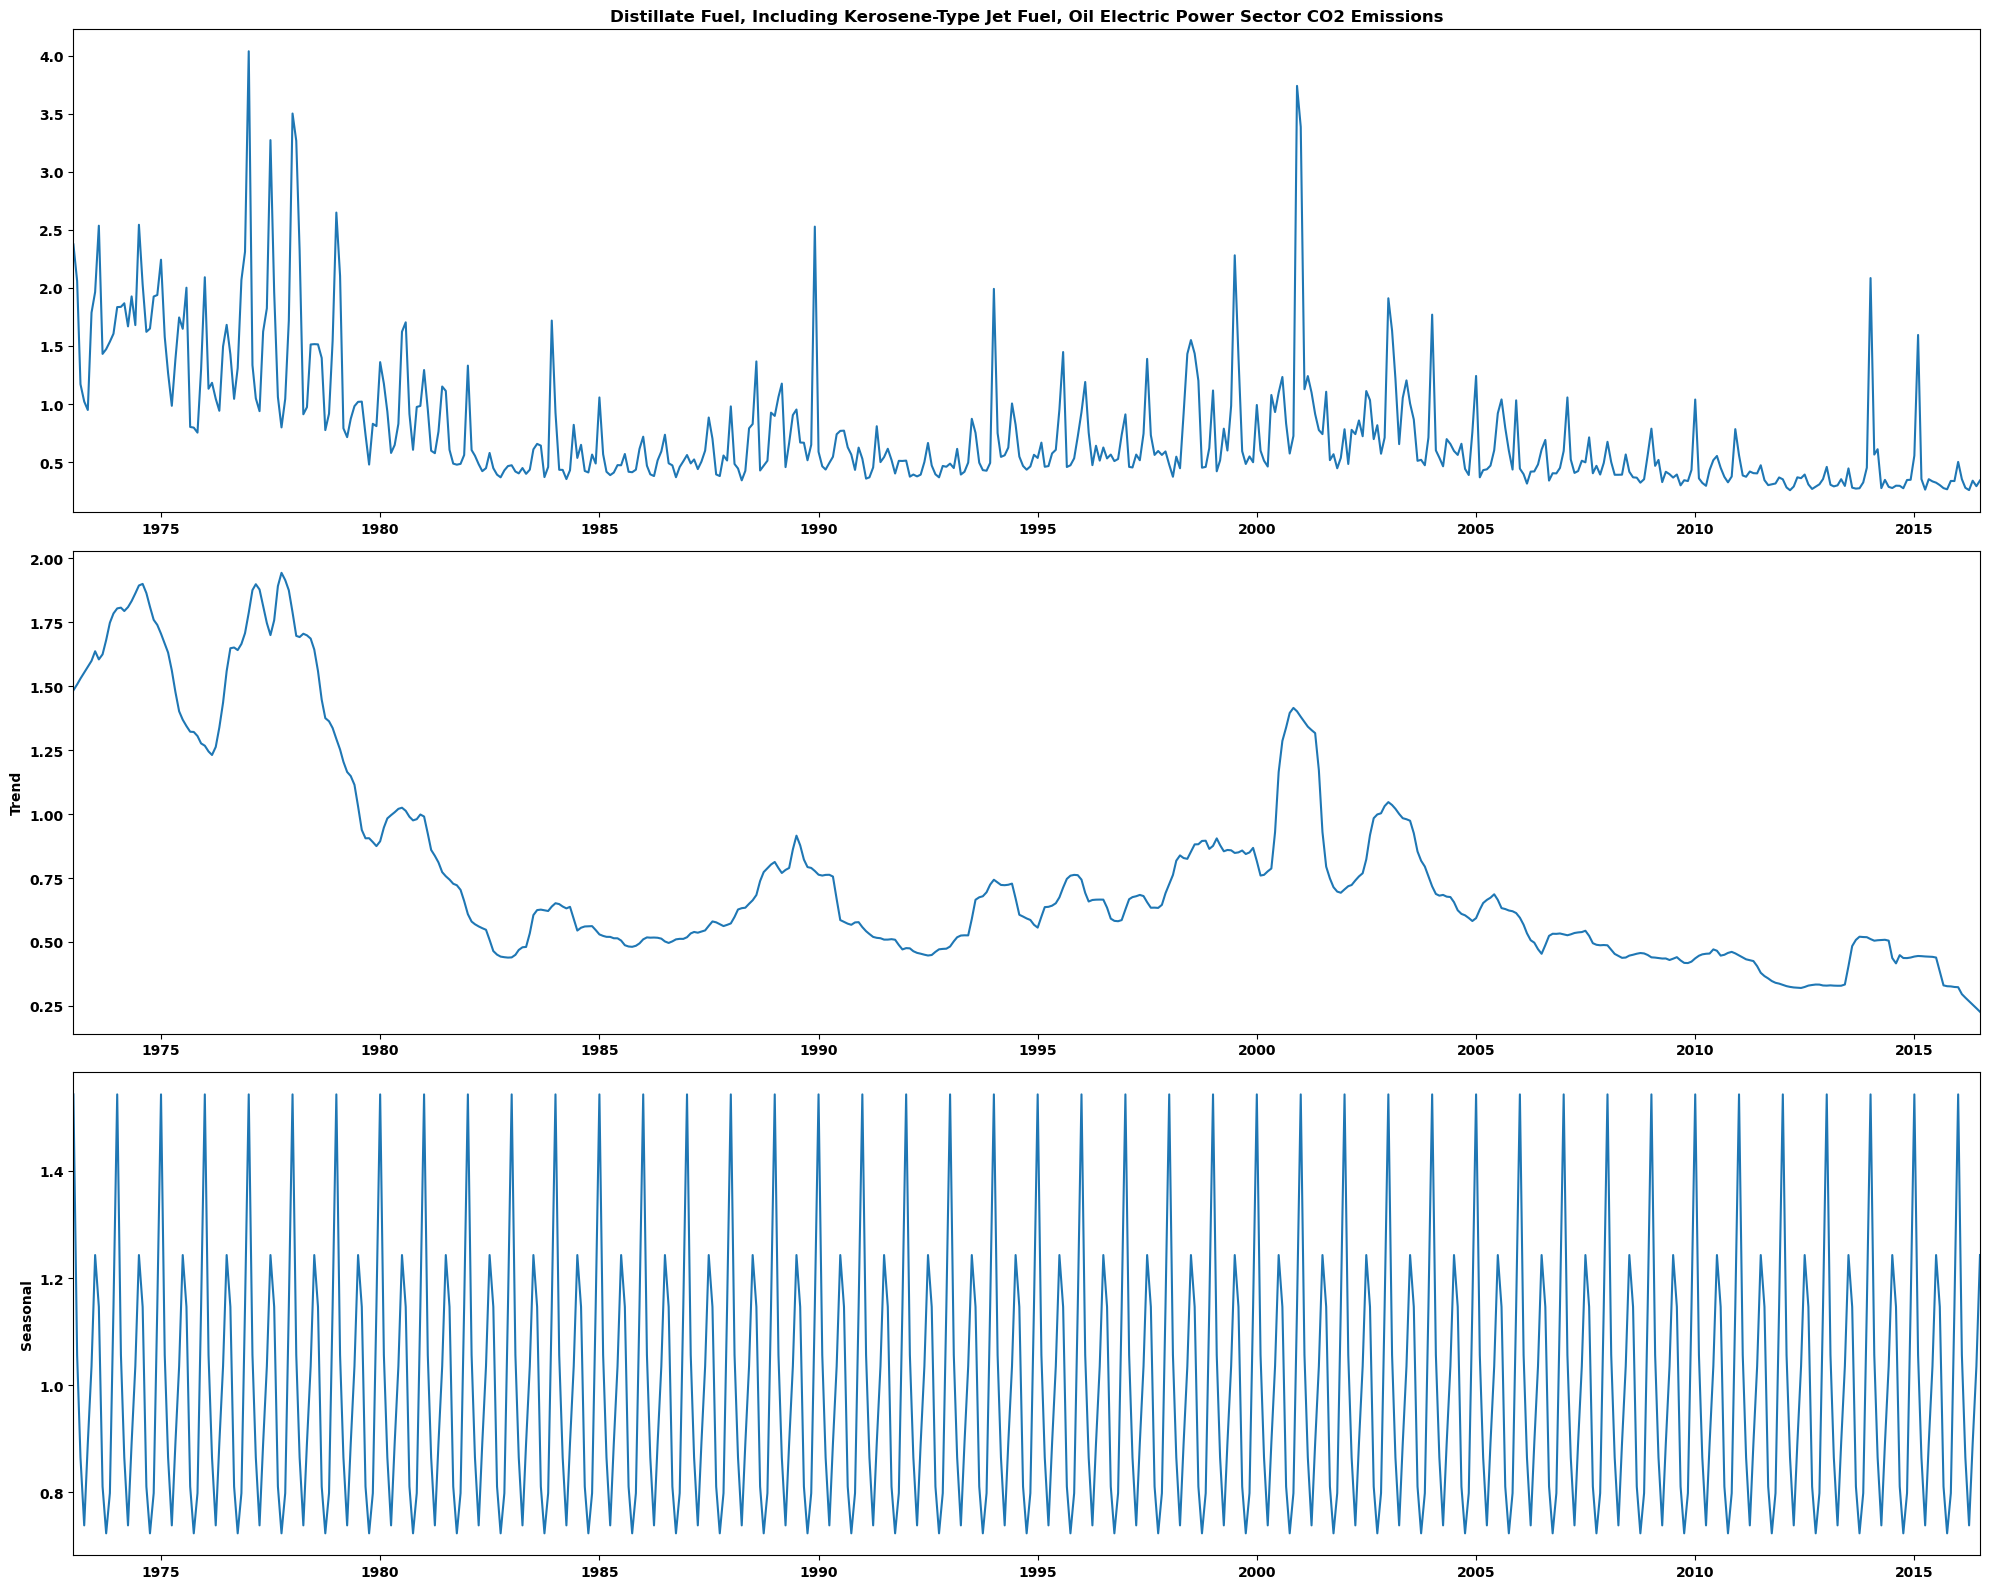

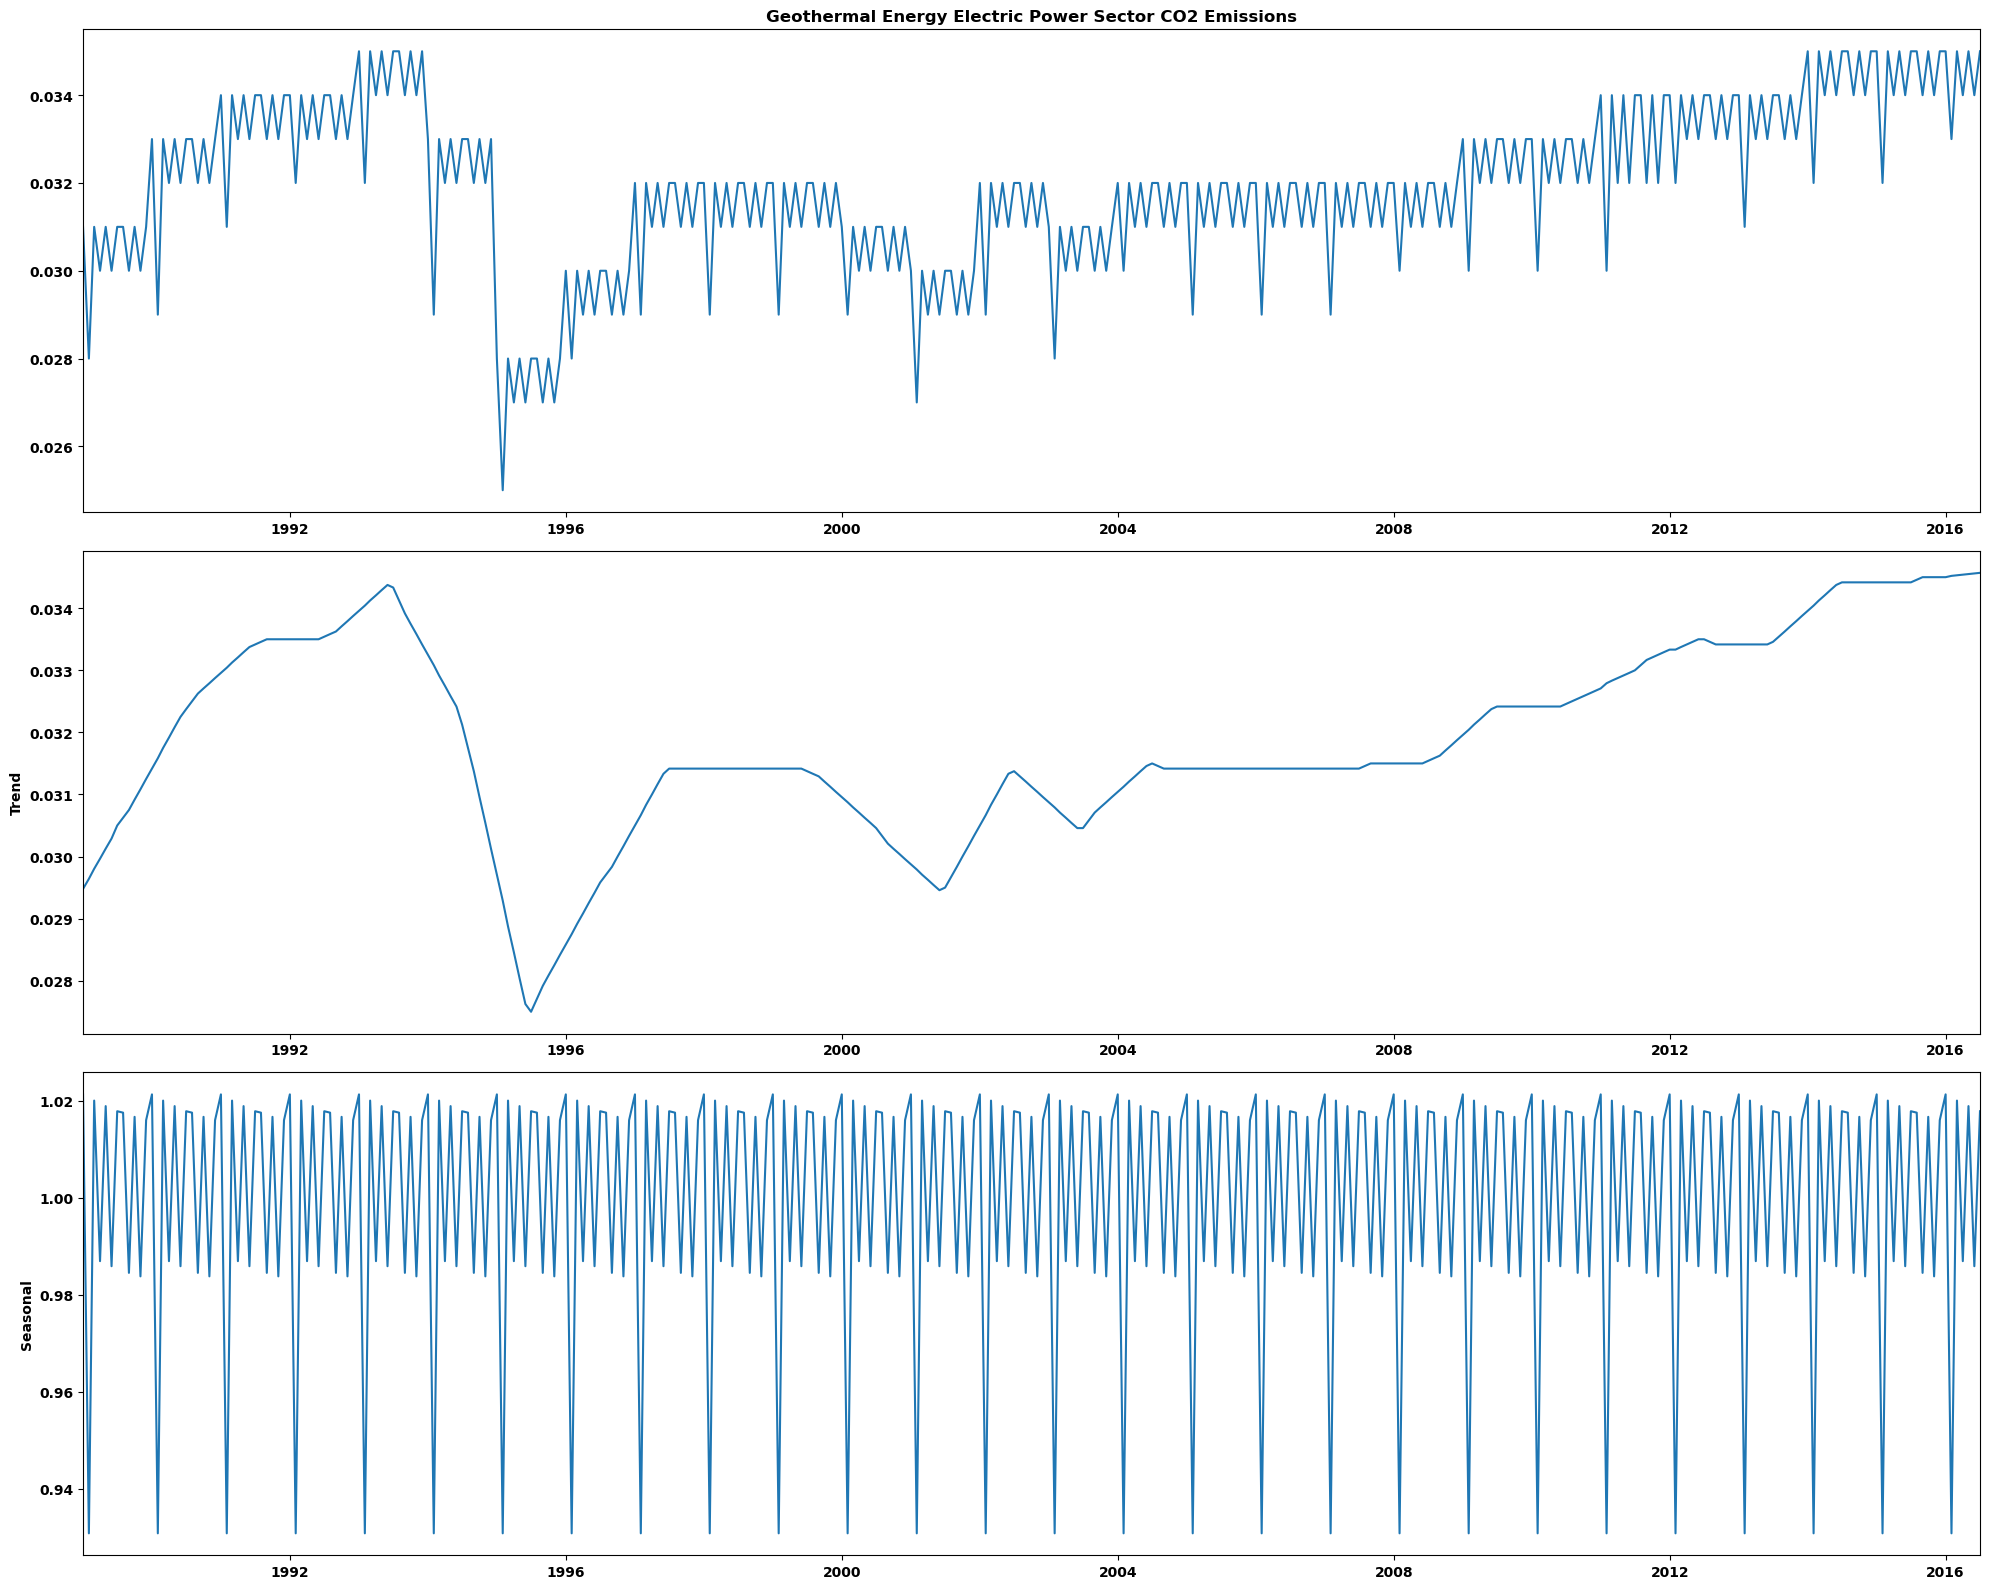

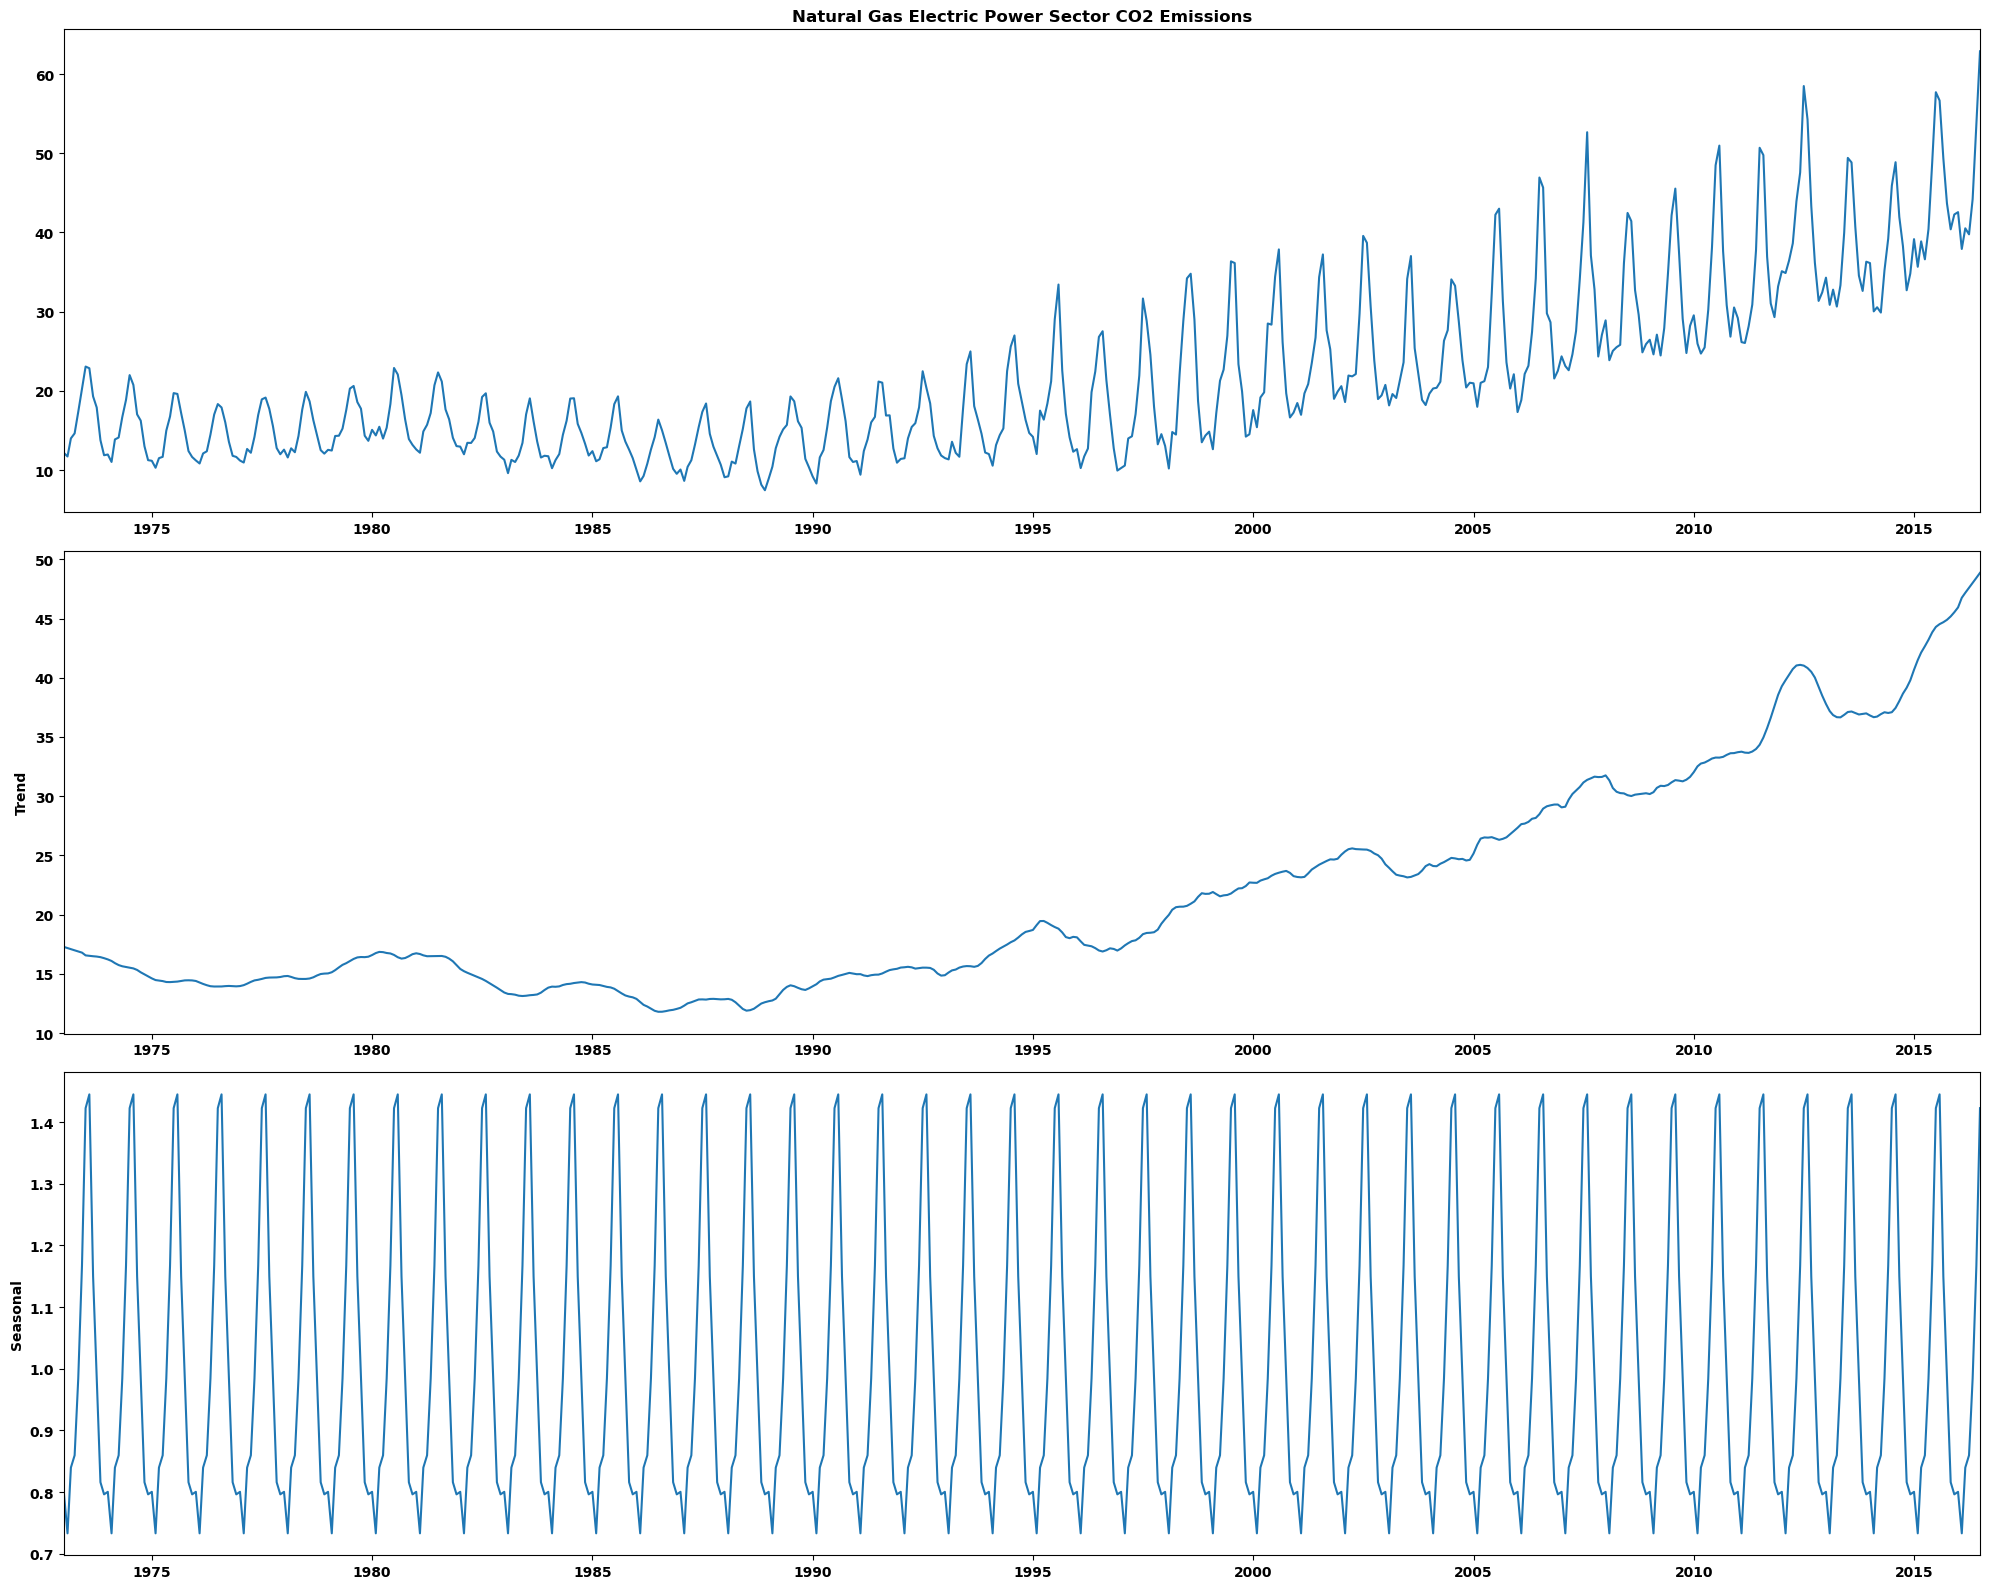

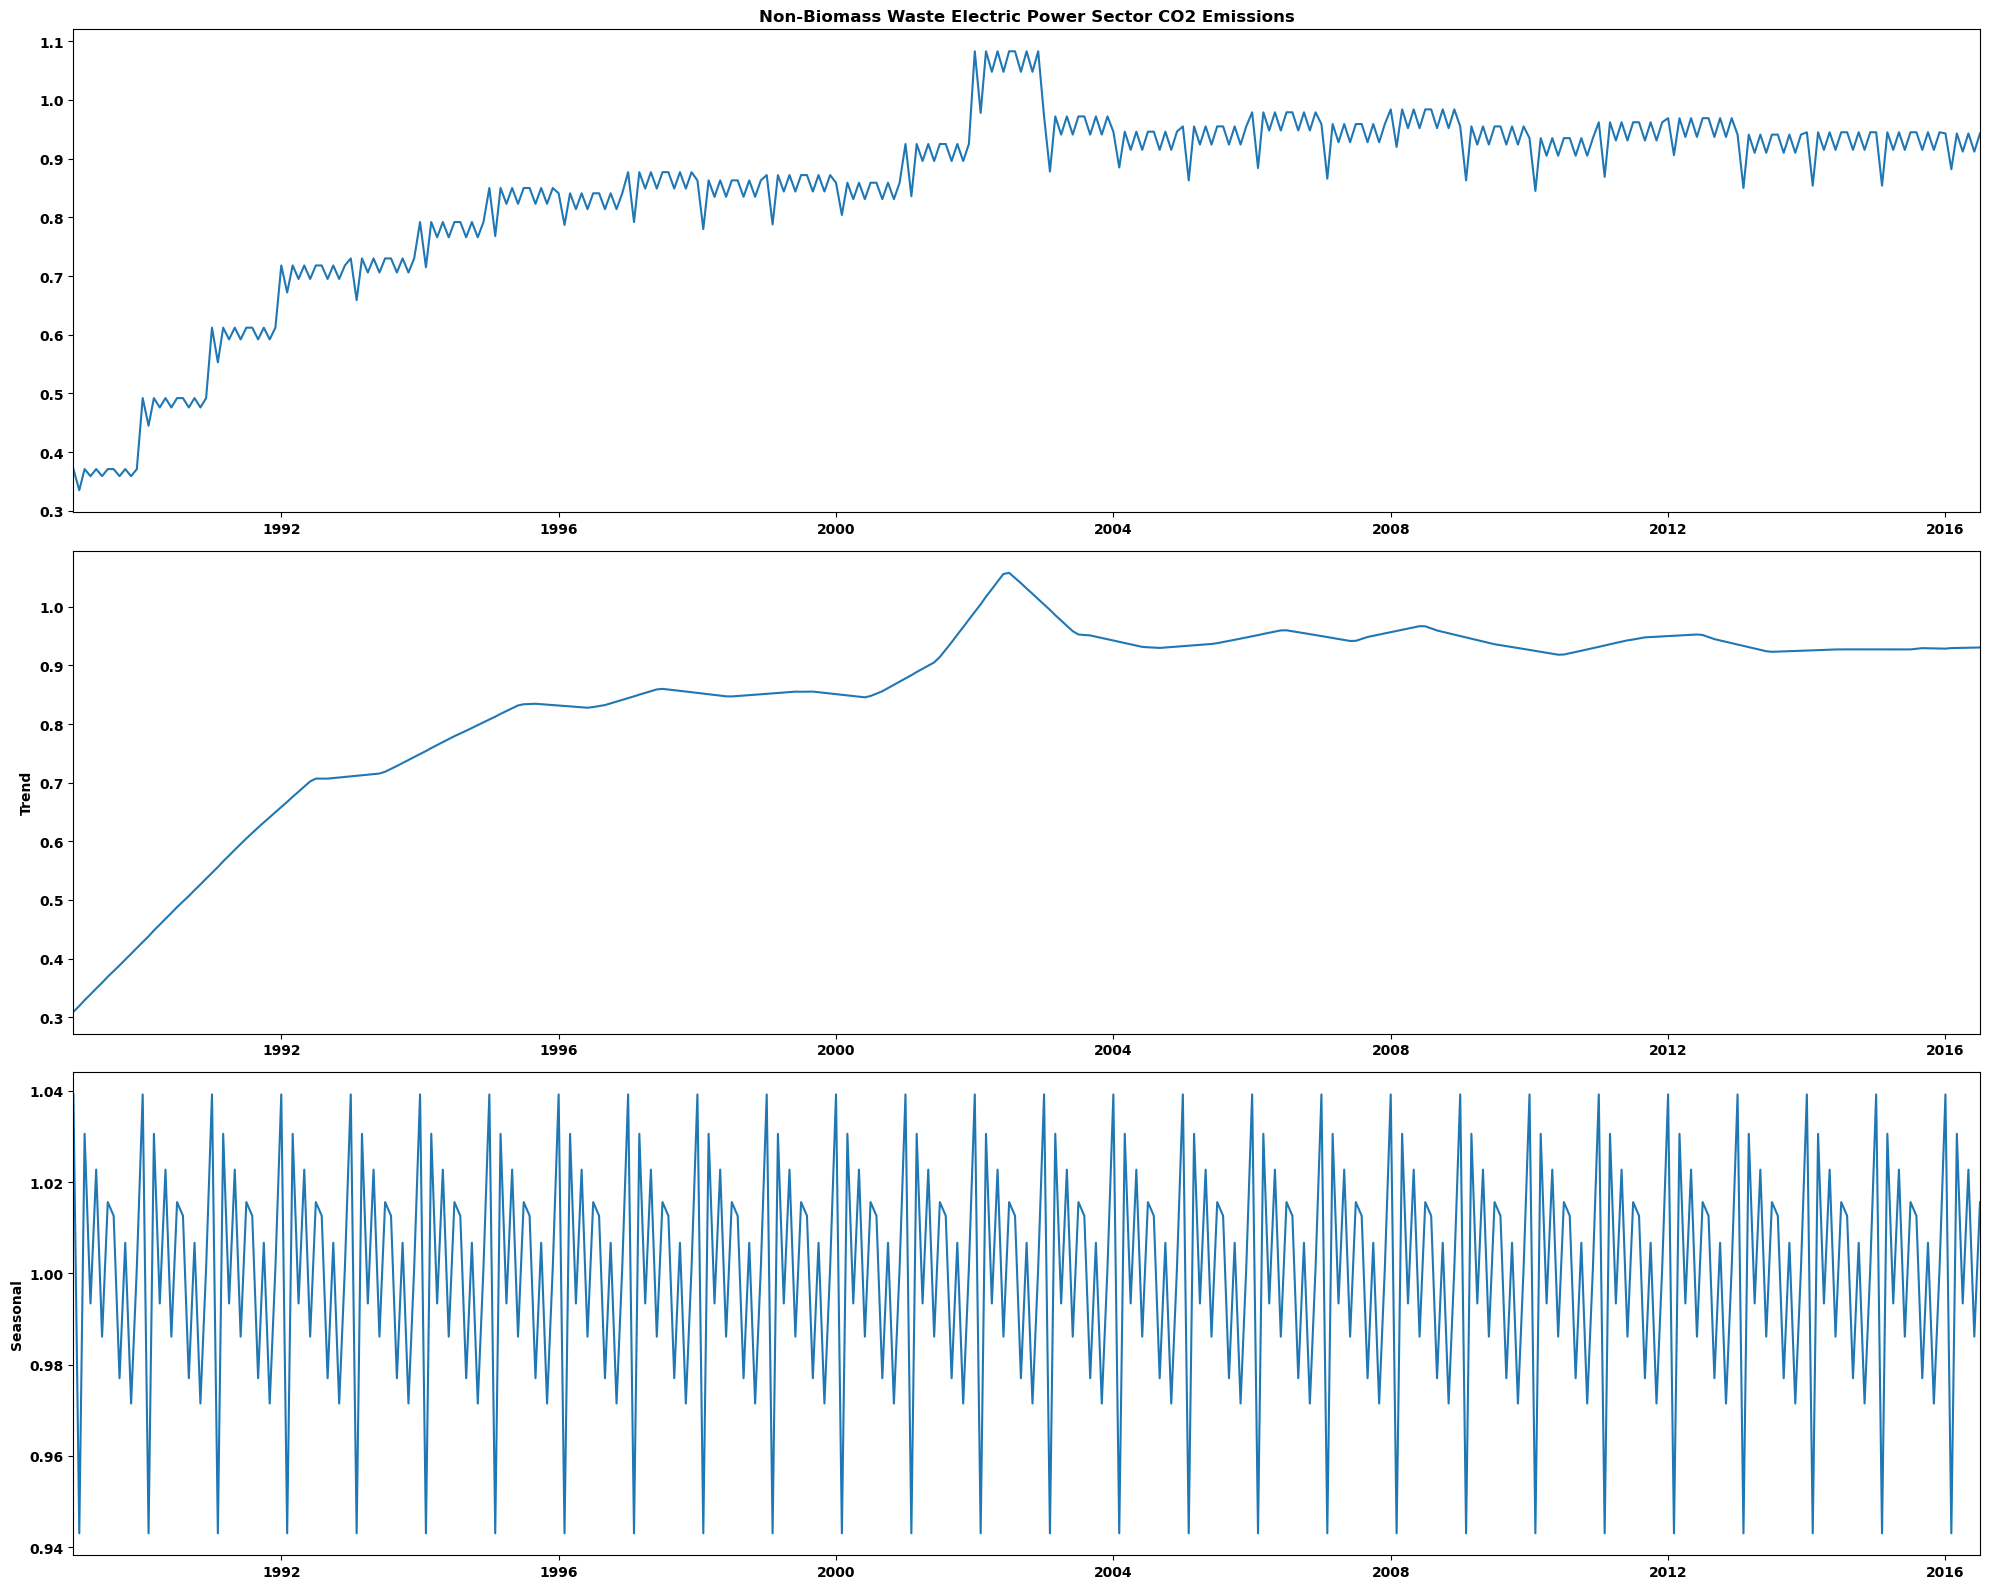

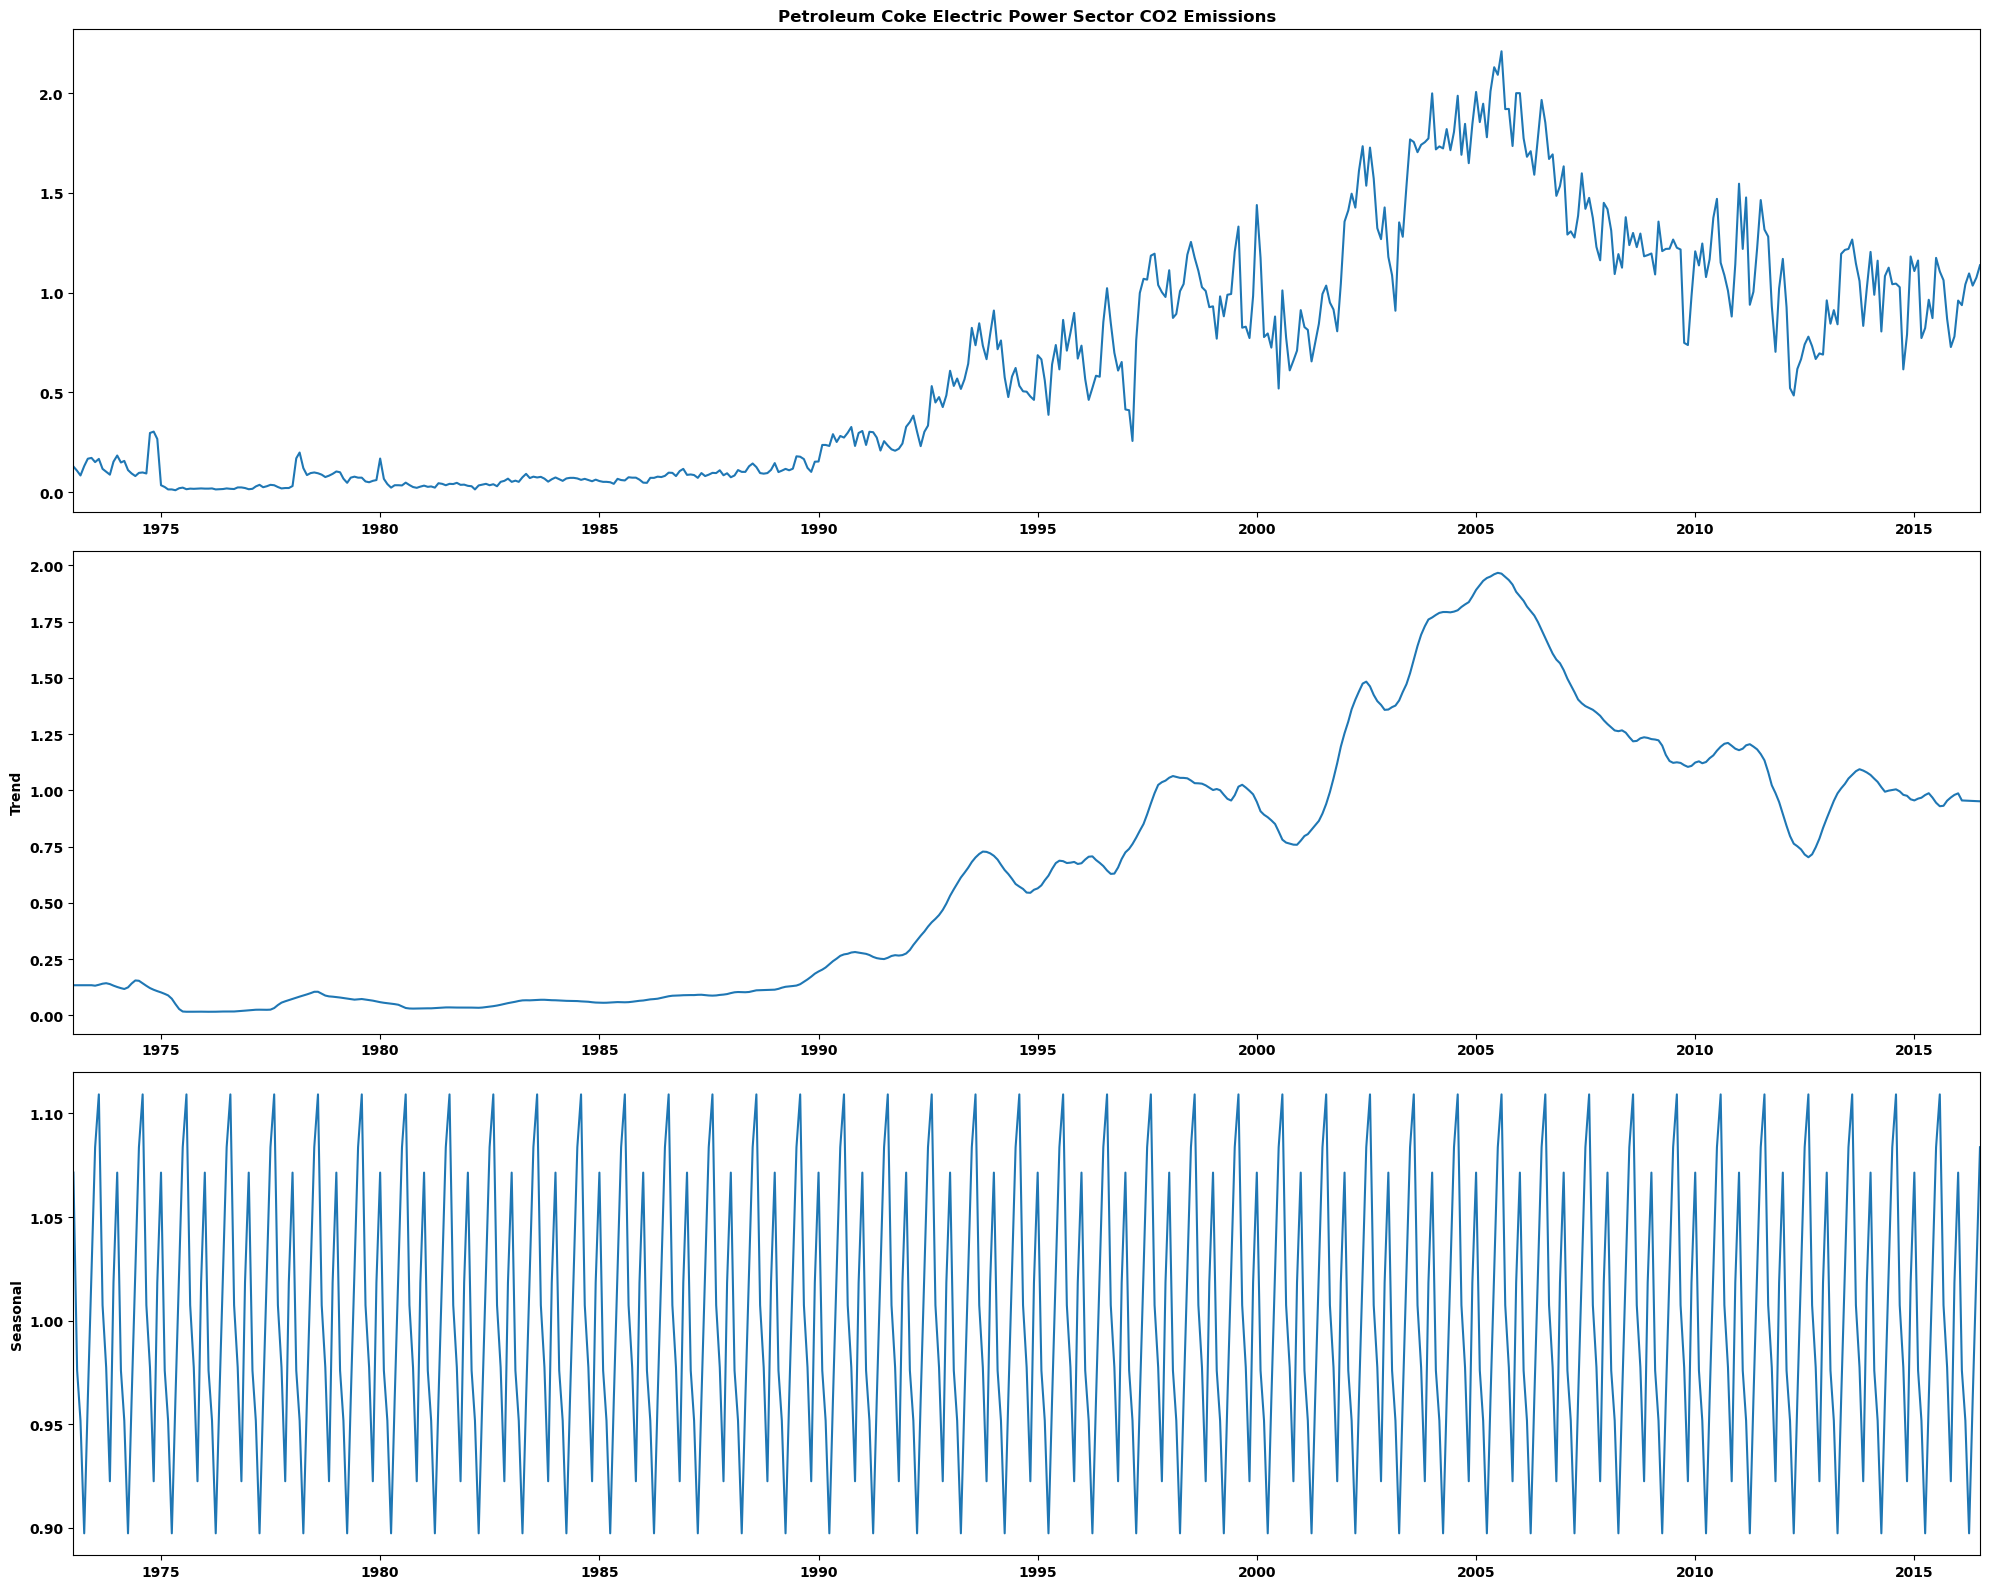

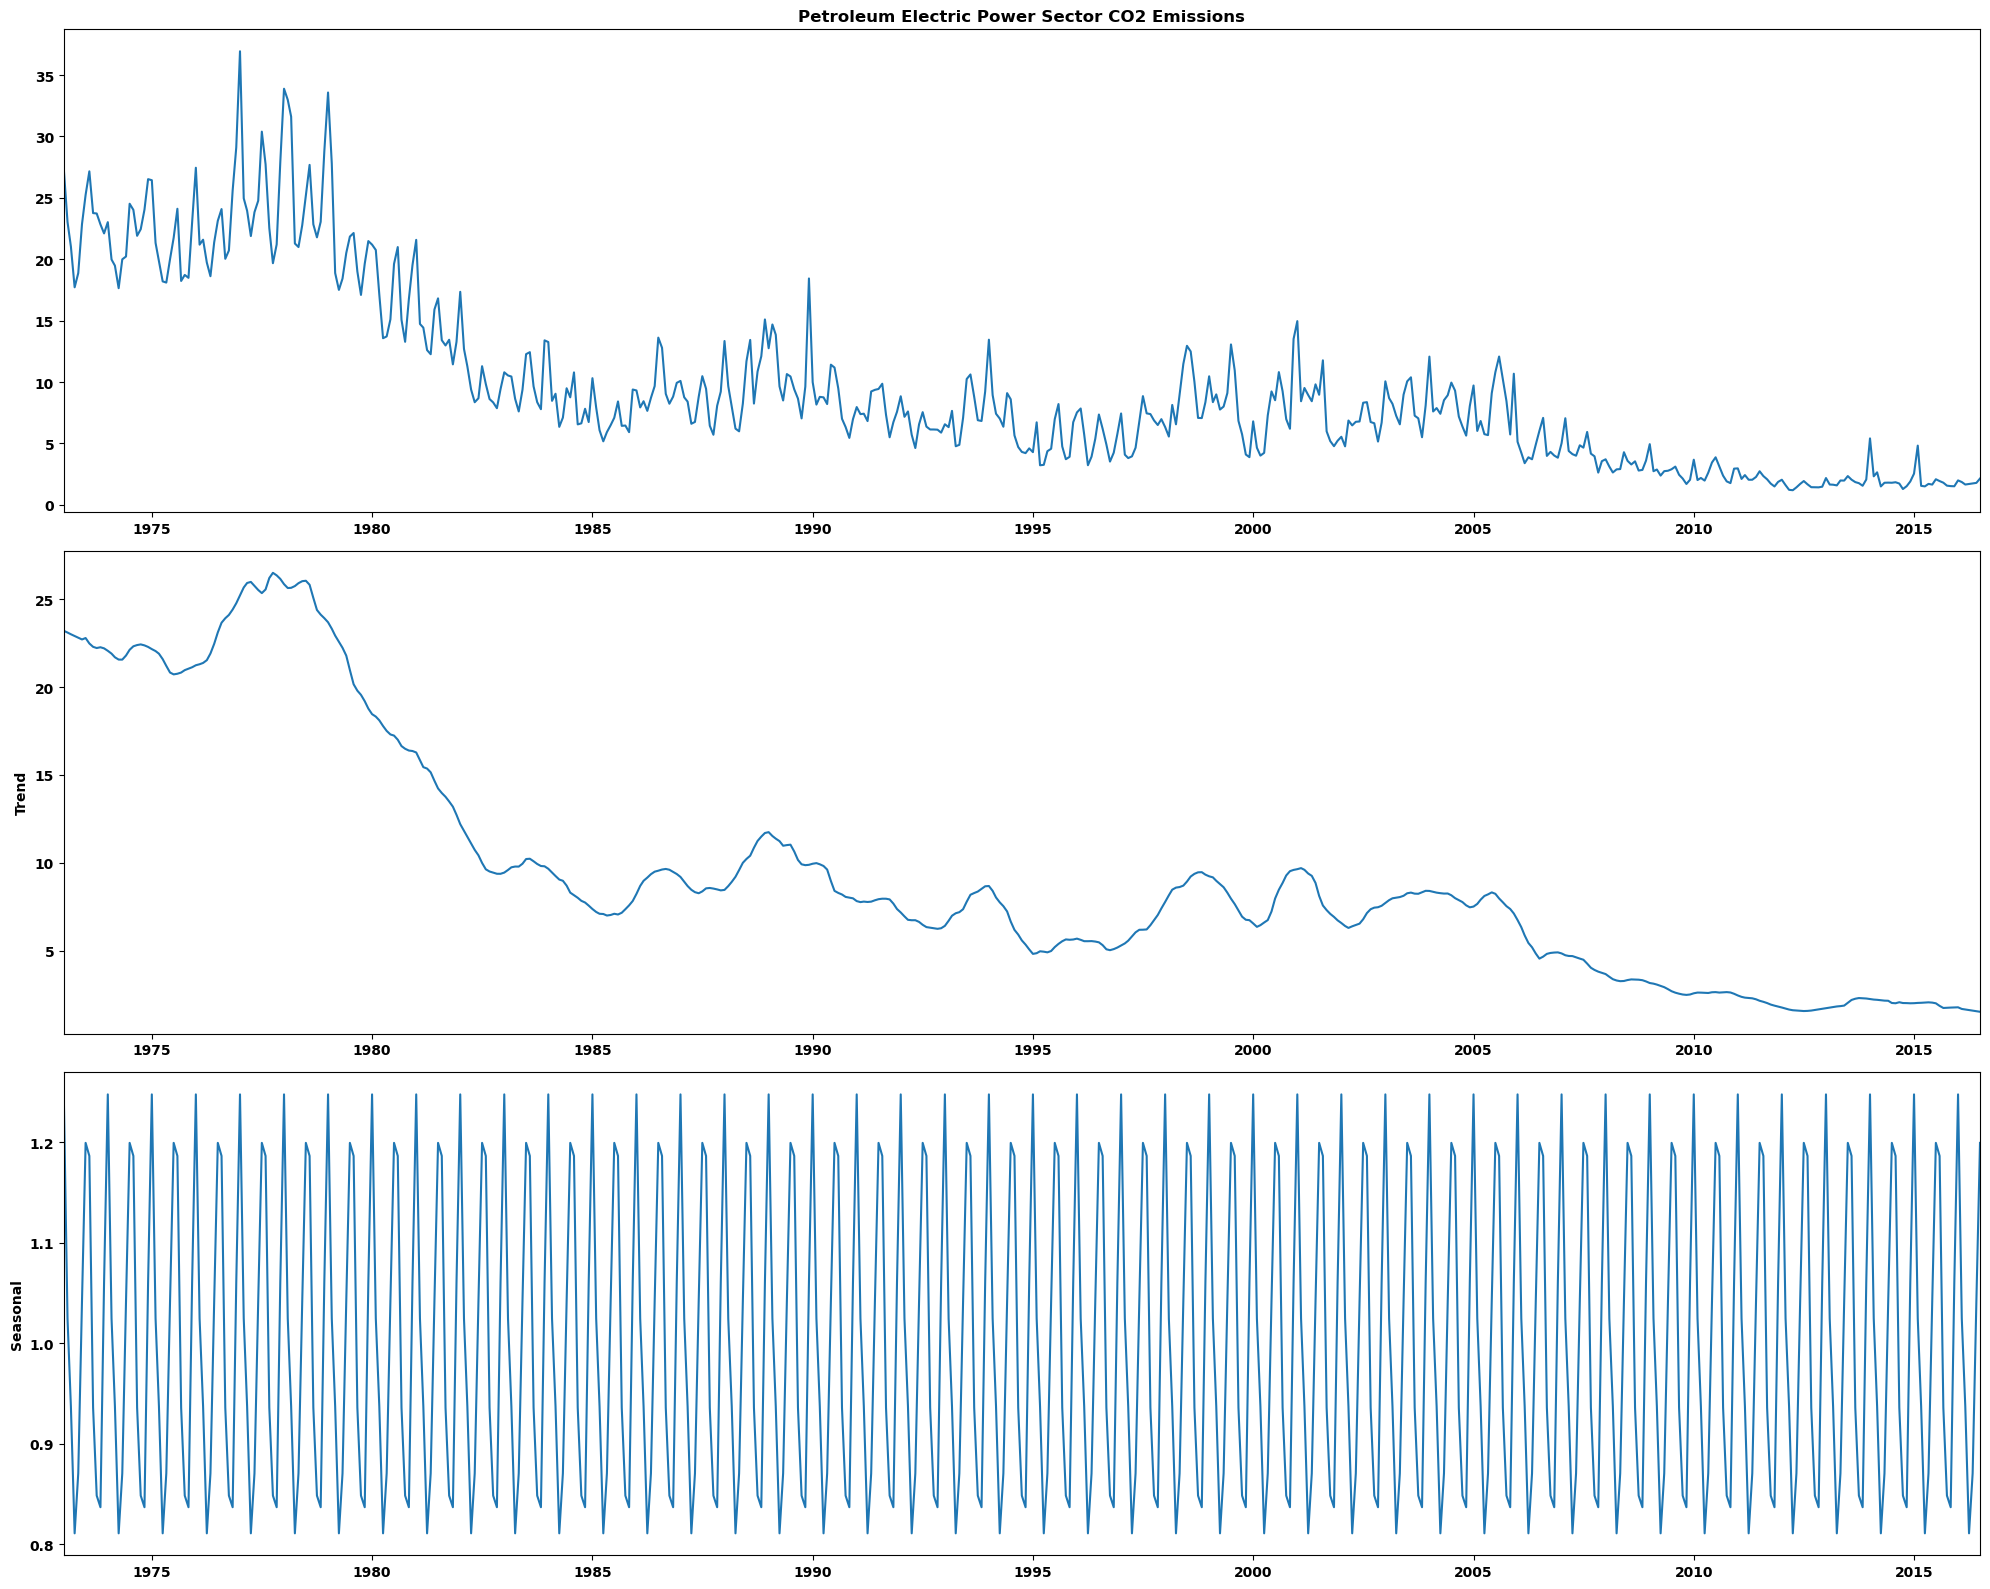

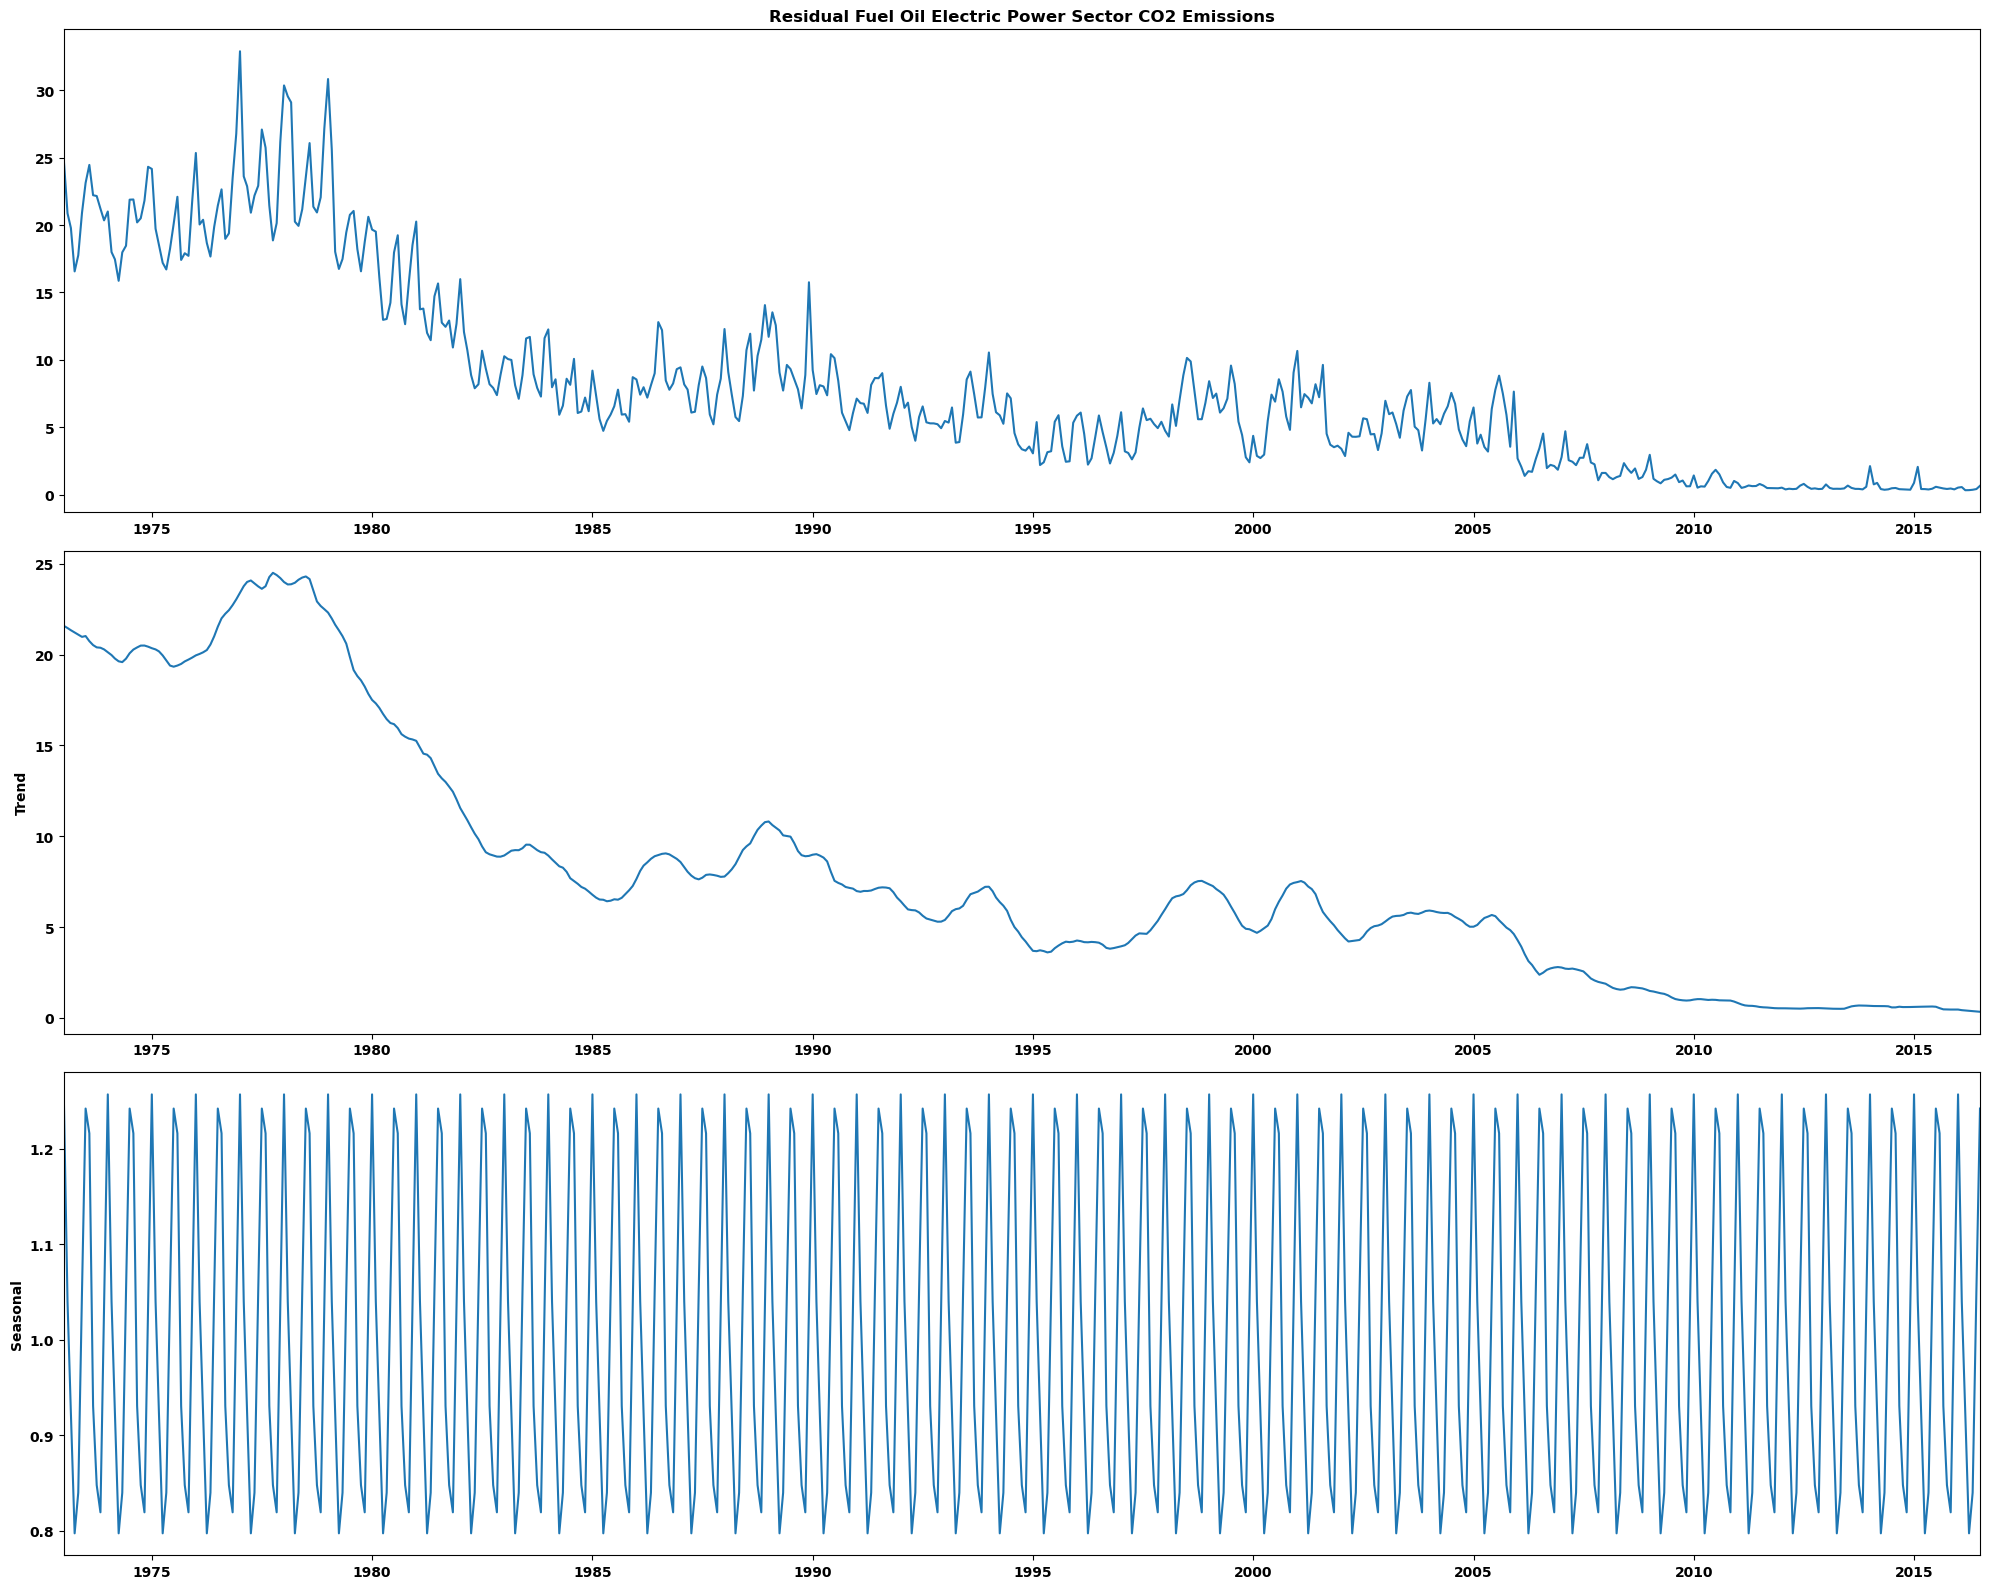

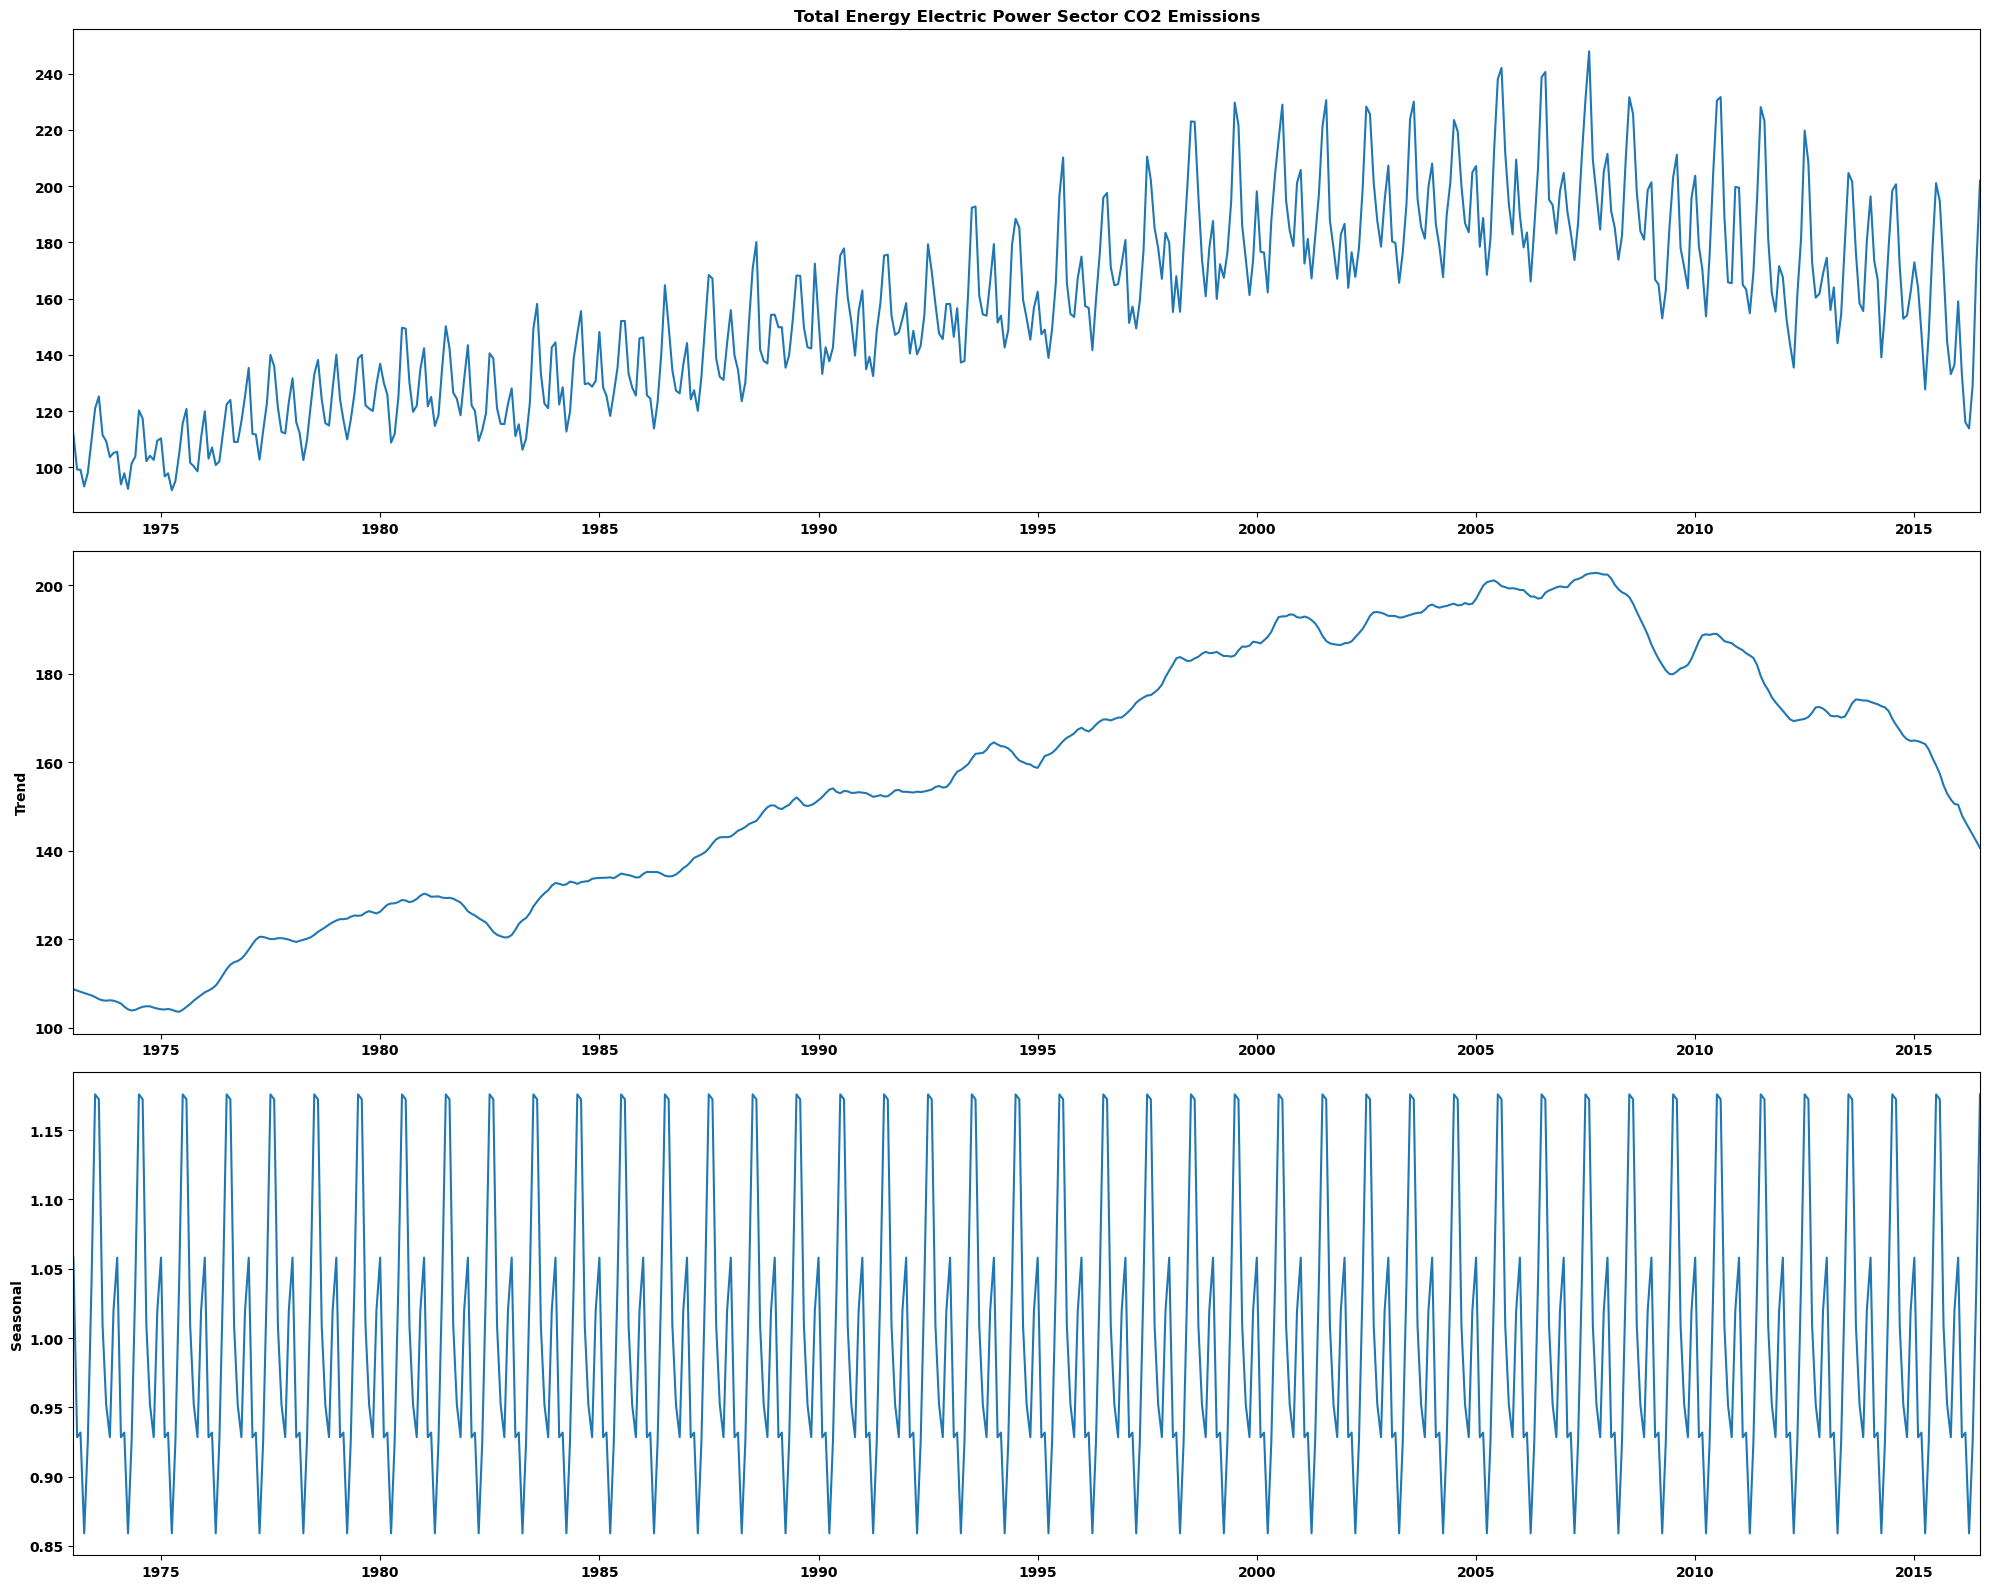

In [16]:
for desc, group in Energy:
    decompositon = seasonal_decompose(pd.Series(group.Value, index = group.index, name = desc),
                                      model='multiplicative', 
                                      extrapolate_trend='freq')
    fig= decompositon.plot(resid=False)

#### We can see that:
- The trend of most reason that cause CO2 emissions is increased (clearly in the trend graph).
- The natural gas consumption has been increasing most in recent years.
- Just the co2 caused by Distillate Fuel and Coal Electric Power tended to go down in the last 5 years ( 2010 - 2015). More than that the trend that the emissons caused by Distillate Fuel was very low near 0.

In [17]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

In [18]:
CO2_per_source = df.groupby('Description')['Value'].sum().sort_values()

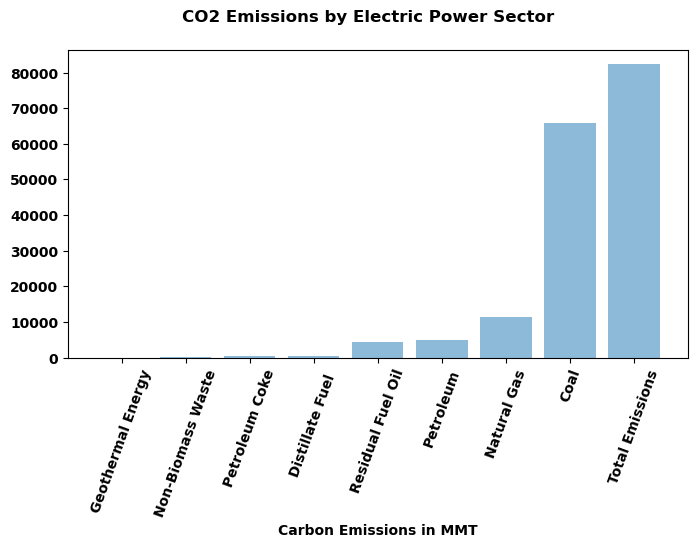

In [19]:
fig = plt.figure(figsize = (8,4))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle("CO2 Emissions by Electric Power Sector")
plt.xticks(x_tick, x_label, rotation = 70)
plt.yticks()
plt.xlabel('Carbon Emissions in MMT')
plt.show()

In [20]:
Emissions = df.iloc[:,1:]
Emissions= Emissions.groupby(['Description', pd.Grouper(freq = 'MS')])['Value'].sum().unstack(level = 0)
natural_gas = Emissions["Natural Gas Electric Power Sector CO2 Emissions"]
natural_gas

YYYYMM
1973-01-01    12.175
1973-02-01    11.708
1973-03-01    13.994
1973-04-01    14.627
1973-05-01    17.344
               ...  
2016-03-01    40.525
2016-04-01    39.763
2016-05-01    44.210
2016-06-01    53.567
2016-07-01    62.881
Freq: MS, Name: Natural Gas Electric Power Sector CO2 Emissions, Length: 523, dtype: float64

### Train, test with test has the data of the last 3 years

In [21]:
train = natural_gas.loc[:'2014-01-01']
test = natural_gas.loc['2014-01-01':]

In [22]:
test.head()

YYYYMM
2014-01-01    36.133
2014-02-01    30.036
2014-03-01    30.554
2014-04-01    29.885
2014-05-01    35.211
Freq: MS, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

In [23]:
test.tail()

YYYYMM
2016-03-01    40.525
2016-04-01    39.763
2016-05-01    44.210
2016-06-01    53.567
2016-07-01    62.881
Freq: MS, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

### The model we usually use for time-series forcast is Arima

In [24]:
from pmdarima.arima import auto_arima

In [25]:
stepwise_model = auto_arima(natural_gas, start_p=2, start_q= 2,
                            max_p=5, max_q=5, m=12,
                            start_P=1, seasonal=True,
                            d=1, D=1, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=2058.286, Time=1.15 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2332.657, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2181.357, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2090.016, Time=0.30 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=2055.808, Time=1.70 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(2,1,2)(0,1,2)[12]             : AIC=2057.773, Time=4.56 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=inf, Time=2.34 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=2059.671, Time=6.04 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=2053.898, Time=0.99 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=2262.019, Time=0.20 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=2055.851, Time=1.08 sec
 ARIMA(1,1,2)(0,1,2)[12]             : AIC=2055.844, Time=2.28 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=2136.428, Time=1.12 sec
 ARIMA(1,1,2)(1,1,2)[12]     

In [26]:
print(stepwise_model.aic())

2052.3784376085105


In [27]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [28]:
future_forecast = stepwise_model.predict(n_periods=len(test))

In [29]:
future_forecast

2014-02-01    33.537538
2014-03-01    34.596085
2014-04-01    34.691745
2014-05-01    38.079403
2014-06-01    44.334184
2014-07-01    54.270239
2014-08-01    54.014253
2014-09-01    43.496408
2014-10-01    37.324538
2014-11-01    33.761339
2014-12-01    36.460842
2015-01-01    37.122773
2015-02-01    34.686225
2015-03-01    35.846953
2015-04-01    36.008316
2015-05-01    39.438221
2015-06-01    45.720167
2015-07-01    55.673688
2015-08-01    55.428934
2015-09-01    44.918310
2015-10-01    38.751084
2015-11-01    35.190871
2015-12-01    37.892294
2016-01-01    38.555459
2016-02-01    36.119705
2016-03-01    37.280943
2016-04-01    37.442635
2016-05-01    40.872751
2016-06-01    47.154832
2016-07-01    57.108441
2016-08-01    56.863742
Freq: MS, dtype: float64

In [30]:
future_forecast = pd.DataFrame(future_forecast, index = test.index, columns=['Prediction'])

In [31]:
future_forecast = stepwise_model.predict(n_periods=len(test) + 36)
future_forecast.to_frame()

0
2014-02-01  33.537538
2014-03-01  34.596085
2014-04-01  34.691745
2014-05-01  38.079403
2014-06-01  44.334184
...               ...
2019-04-01  41.747360
2019-05-01  45.177478
2019-06-01  51.459560
2019-07-01  61.413169
2019-08-01  61.168471

[67 rows x 1 columns]

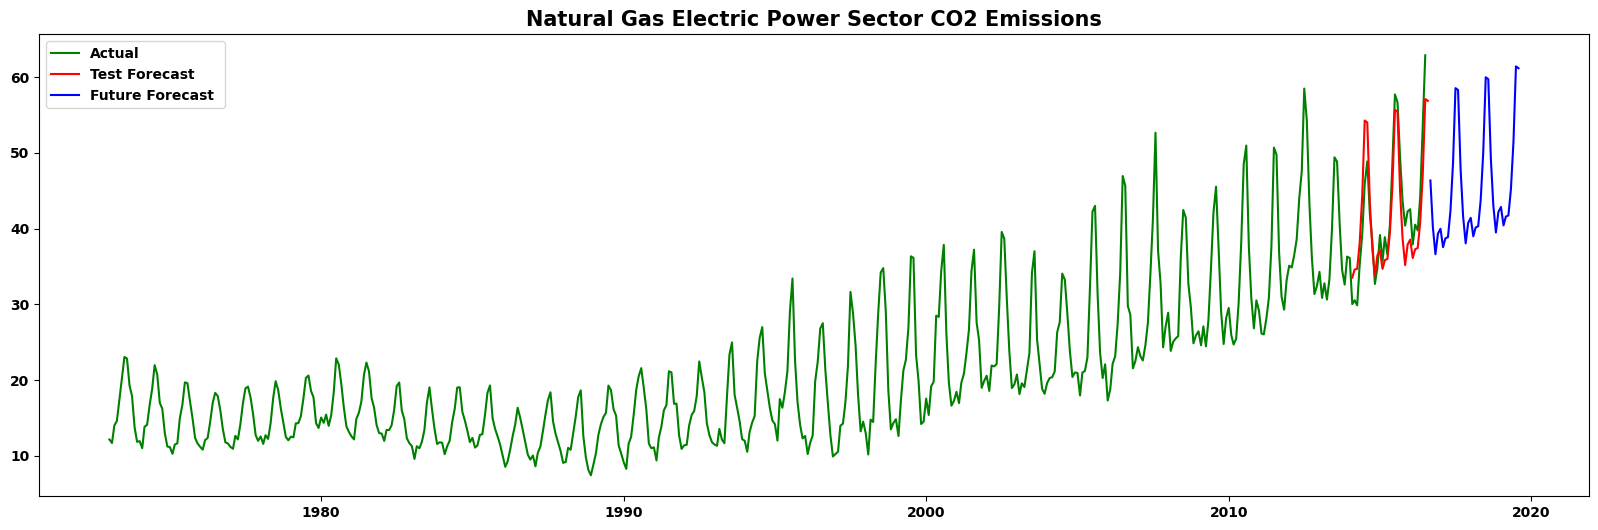

In [32]:
plt.figure(figsize = (20, 6))
plt.plot(natural_gas, label ='Actual', color = 'green')
plt.plot(future_forecast[:len(test)], label = "Test Forecast", color = "red")
plt.plot(future_forecast[len(test):], label = "Future Forecast ", color = "blue")

plt.title("Natural Gas Electric Power Sector CO2 Emissions", fontsize = 15)

plt.legend(loc="upper left",  prop={'size': 10})

plt.show()